# 🔍 Exploratory Data Analysis (EDA) — Keşifsel Veri Analizi

## Uygulamalı Makine Öğrenmesi Dersi — Ders Hazırlık Dökümanı

| Bilgi | Detay |
|---|---|
| **Hazırlayan** | Sevdanur GENÇ |
| **Tarih** | 2025-2026 Bahar Yarıyılı |
| **Ders** | Uygulamalı Makine Öğrenmesi |
| **Seviye** | Başlangıç → İleri |
| **Süre** | ~4 saat |

---

> 📌 **Bu notebook'u nasıl kullanmalısınız?**  
> Hücreleri sırayla çalıştırın. Her bölüm önceki bölüme bağlıdır.  
> Markdown hücreleri teori, kod hücreleri uygulama içerir.  
> 💡 işareti ipuçlarını, ⚠️ uyarıları, 🎯 önemli noktaları belirtir.

---

## 📋 İçindekiler

1. [EDA Nedir ve Neden Önemlidir?](#1)
2. [Kütüphaneler ve Kurulum](#2)
3. [Veri Setleri: Tanıtım ve Yükleme](#3)
4. [Temel Veri İncelemesi](#4)
5. [Eksik Veri Analizi](#5)
6. [Tek Değişkenli Analiz (Univariate)](#6)
7. [İki Değişkenli Analiz (Bivariate)](#7)
8. [Çok Değişkenli Analiz (Multivariate)](#8)
9. [Aykırı Değer (Outlier) Analizi](#9)
10. [İleri Görselleştirme Teknikleri](#10)
11. [İstatistiksel Testler](#11)
12. [Otomatik EDA Araçları (ydata-profiling)](#12)
13. [EDA Raporu Hazırlama](#13)
14. [Sonuç, Özet ve Kontrol Listesi](#14)

---

## 1. EDA Nedir ve Neden Önemlidir? <a id="1"></a>

### 🎯 EDA Tanımı

**Exploratory Data Analysis (EDA)** — Türkçesiyle *Keşifsel Veri Analizi* — veri bilimi sürecinin en kritik aşamalarından biridir.

**John W. Tukey** tarafından 1977'de *"Exploratory Data Analysis"* kitabıyla sistematize edilen bu yaklaşım şunu savunur:  
> *"Verilerinizi mümkün olduğu kadar çok farklı şekilde görselleştirin. Henüz düşünmediğiniz bir şeyi görme ihtimaliniz çok yüksek."*

---

### 🔍 EDA'nın Temel Amaçları

| Amaç | Açıklama |
|---|---|
| **Veri Kalitesi** | Eksik değerler, hatalar, tutarsızlıklar |
| **Dağılımları Anlama** | Her değişkenin nasıl dağıldığı |
| **İlişki Keşfi** | Değişkenler arası korelasyon ve bağımlılıklar |
| **Aykırı Değer Tespiti** | Normalden sapan gözlemler |
| **Hipotez Oluşturma** | İleriki analizler için varsayım geliştirme |
| **Model Stratejisi** | Hangi algoritmaların uygun olduğuna karar verme |

---

### 📊 Veri Bilimi Sürecindeki Yeri

```
Ham Veri Toplama
       ↓
  ┌─────────────────────────────────────────────────┐
  │            EXPLORATORY DATA ANALYSIS            │ ← BURADASINIZ
  │  İncele → Görselleştir → Hipotez Kur → Tekrarla │
  └─────────────────────────────────────────────────┘
       ↓
  Veri Temizleme & Preprocessing
       ↓
  Feature Engineering
       ↓
  Model Seçimi & Eğitimi
       ↓
  Değerlendirme & Yorumlama
```

---

### ⚡ Neden Bu Kadar Önemli?

- **🕐 Zaman Tasarrufu**: Erken aşamada sorunları tespit ederek ilerleyen aşamalarda zaman kaybını önler
- **🎯 Model Performansı**: Doğru feature seçimi ve preprocessing stratejilerini belirler
- **💡 İş Anlayışı**: Domain bilgisi kazandırır, iş kararlarını destekler
- **⚠️ Risk Yönetimi**: Potansiyel veri sorunlarını önceden fark ettirir

---

### 📚 EDA Türleri

**1. Grafik Olmayan (Non-Graphical) EDA:**
- Özet istatistikler (mean, median, std, vb.)
- Frekans tabloları
- Çapraz tablolar (cross-tabulation)

**2. Grafik (Graphical) EDA:**
- Histogramlar, box plot'lar, scatter plot'lar
- Korelasyon matrisleri
- Pair plot'lar, heatmap'ler

## 2. Kütüphaneler ve Kurulum <a id="2"></a>

### 📦 Kullanacağımız Kütüphaneler

| Kütüphane | Versiyon | Kullanım Amacı |
|---|---|---|
| `pandas` | ≥2.0 | Veri manipülasyonu ve analizi |
| `numpy` | ≥1.24 | Matematiksel işlemler |
| `matplotlib` | ≥3.7 | Temel görselleştirme |
| `seaborn` | ≥0.12 | İstatistiksel görselleştirme |
| `plotly` | ≥5.15 | İnteraktif görselleştirme |
| `scipy` | ≥1.10 | İstatistiksel testler |
| `missingno` | ≥0.5 | Eksik veri görselleştirme |
| `ydata-profiling` | ≥4.5 | Otomatik EDA raporu |

### 🔧 Kurulum Komutu

```bash
pip install pandas numpy matplotlib seaborn plotly scipy missingno ydata-profiling scikit-learn statsmodels
```

In [4]:
# ═══════════════════════════════════════════════════
# BÖLÜM 2: GEREKLİ KÜTÜPHANELERİN YÜKLENMESİ
# ═══════════════════════════════════════════════════

# ── Temel veri manipülasyonu ─────────────────────────────
import pandas as pd                  # DataFrame işlemleri
import numpy as np                   # Sayısal hesaplamalar

# ── Görselleştirme ───────────────────────────────────────
import matplotlib.pyplot as plt      # Temel çizim
import seaborn as sns                # İstatistiksel görselleştirme
import plotly.express as px          # Hızlı interaktif grafikler
import plotly.graph_objects as go    # Detaylı interaktif grafikler
from plotly.subplots import make_subplots  # Alt grafik düzeni

# ── Eksik veri görselleştirme ────────────────────────────
try:
    import missingno as msno         # Eksik veri matrisi/bar/heatmap
    MISSINGNO_AVAILABLE = True
except ImportError:
    MISSINGNO_AVAILABLE = False
    print("⚠️  missingno kurulu değil: pip install missingno")

# ── İstatistiksel testler ────────────────────────────────
from scipy import stats
from scipy.stats import (
    shapiro,          # Shapiro-Wilk normallik testi
    normaltest,       # D'Agostino-Pearson normallik testi
    chi2_contingency, # Ki-kare bağımsızlık testi
    pearsonr,         # Pearson korelasyon
    spearmanr,        # Spearman korelasyon
    mannwhitneyu,     # Mann-Whitney U testi
    kruskal,          # Kruskal-Wallis H testi
    ttest_ind,        # Bağımsız örneklem t-testi
    f_oneway          # One-way ANOVA
)
import statsmodels.api as sm         # İleri istatistiksel modeller

# ── Makine öğrenmesi yardımcıları ────────────────────────
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# ── Sistem ───────────────────────────────────────────────
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML, Markdown

# ── Görsel temalar ───────────────────────────────────────
plt.style.use('seaborn-v0_8-whitegrid')  # Seaborn teması
sns.set_palette("husl")                  # Renk paleti
plt.rcParams.update({
    'figure.figsize': (12, 7),
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'figure.dpi': 100
})

# Plotly varsayılan teması
import plotly.io as pio
pio.templates.default = "plotly_white"

# ── Versiyon kontrolü ────────────────────────────────────
print("✅ Tüm kütüphaneler başarıyla yüklendi!")
print("─" * 45)
print(f"  pandas     : {pd.__version__}")
print(f"  numpy      : {np.__version__}")
print(f"  matplotlib : {plt.matplotlib.__version__}")
print(f"  seaborn    : {sns.__version__}")
print(f"  plotly : {plotly.__version__}")
print(f"  scipy  : {scipy.__version__}")
print("─" * 45)

✅ Tüm kütüphaneler başarıyla yüklendi!
─────────────────────────────────────────────
  pandas     : 2.2.2
  numpy      : 2.0.2
  matplotlib : 3.10.0
  seaborn    : 0.13.2
  plotly : 5.24.1
  scipy  : 1.16.3
─────────────────────────────────────────────


## 3. Veri Setleri: Tanıtım ve Yükleme <a id="3"></a>

Bu derste **farklı analiz senaryolarını** kapsamak için birden fazla veri seti kullanıyoruz:

---

### 📁 Veri Setleri Özeti

#### 1. 🚢 Titanic Dataset
- **Kaynak**: Kaggle — [titanic/data](https://www.kaggle.com/c/titanic/data) | Seaborn built-in
- **Açıklama**: 1912 Titanic faciasında 891 yolcunun hayatta kalma bilgileri
- **Özellikler**: 12 değişken (yaş, cinsiyet, bilet sınıfı, ücret, vb.)
- **Neden?**: Eksik veri, kategorik+sayısal karışık değişkenler, sınıflandırma hedefi

#### 2. 🌸 Iris Dataset
- **Kaynak**: UCI ML Repository | Seaborn built-in ([link](https://archive.ics.uci.edu/ml/datasets/iris))
- **Açıklama**: 3 çiçek türüne ait 150 gözlem, 4 ölçüm
- **Özellikler**: 5 değişken (sepal/petal uzunluk/genişlik, tür)
- **Neden?**: Temiz veri, çok sınıflı sınıflandırma, görselleştirme örnekleri

#### 3. 💰 Tips Dataset
- **Kaynak**: Seaborn built-in (Bryant & Smith 1995 araştırmasından)
- **Açıklama**: Restoran müşterilerinin fatura ve bahşiş bilgileri
- **Özellikler**: 7 değişken (fatura, bahşiş, cinsiyet, sigara, gün, öğün, boyut)
- **Neden?**: Sürekli değişken regresyonu, korelasyon analizi

#### 4. 🏠 California Housing Dataset
- **Kaynak**: Scikit-learn built-in (1990 California nüfus sayımı)
- **Açıklama**: Ev fiyatlarını etkileyen demografik ve coğrafi faktörler
- **Özellikler**: 9 değişken (gelir, yaş, konum, vb.)
- **Neden?**: Büyük veri seti (~20K satır), regresyon problemi, coğrafi analiz

---

> 💡 **Not**: Seaborn built-in veri setleri GitHub'dan otomatik indirilir.  
> Çevrimdışı çalışıyorsanız: `sns.get_dataset_names()` ile mevcut setleri görebilirsiniz.

In [5]:
# ═══════════════════════════════════════════════════
# BÖLÜM 3: VERİ SETLERİNİN YÜKLENMESİ
# ═══════════════════════════════════════════════════

def yukle_veri_setleri():
    """
    EDA analizi için tüm veri setlerini yükler ve temel bilgileri gösterir.

    Returns:
        dict: {'titanic': df1, 'iris': df2, 'tips': df3, 'housing': df4}
    """
    datasets = {}

    print("📥 Veri setleri yükleniyor...\n")

    # ── 1. Titanic ─────────────────────────────────────────
    # Kaynak: Seaborn kütüphanesi (GitHub'dan otomatik indirir)
    titanic = sns.load_dataset('titanic')
    datasets['titanic'] = titanic
    print(f"  ✅ Titanic     : {titanic.shape[0]:>5} satır × {titanic.shape[1]:>2} sütun")
    print(f"     Kaynak: seaborn.load_dataset('titanic')")
    print(f"     Orijinal: https://www.kaggle.com/c/titanic/data\n")

    # ── 2. Iris ────────────────────────────────────────────
    # Kaynak: Seaborn kütüphanesi (UCI ML Repository kökenli)
    iris = sns.load_dataset('iris')
    datasets['iris'] = iris
    print(f"  ✅ Iris        : {iris.shape[0]:>5} satır × {iris.shape[1]:>2} sütun")
    print(f"     Kaynak: seaborn.load_dataset('iris')")
    print(f"     Orijinal: https://archive.ics.uci.edu/ml/datasets/iris\n")

    # ── 3. Tips ────────────────────────────────────────────
    # Kaynak: Seaborn kütüphanesi (Bryant & Smith 1995)
    tips = sns.load_dataset('tips')
    datasets['tips'] = tips
    print(f"  ✅ Tips        : {tips.shape[0]:>5} satır × {tips.shape[1]:>2} sütun")
    print(f"     Kaynak: seaborn.load_dataset('tips')\n")

    # ── 4. California Housing ──────────────────────────────
    # Kaynak: Scikit-learn built-in (1990 Census)
    from sklearn.datasets import fetch_california_housing
    housing_data = fetch_california_housing(as_frame=True)
    housing = housing_data.frame  # Hem özellikler hem hedef sütun dahil
    datasets['housing'] = housing
    print(f"  ✅ CA Housing  : {housing.shape[0]:>5} satır × {housing.shape[1]:>2} sütun")
    print(f"     Kaynak: sklearn.datasets.fetch_california_housing()")
    print(f"     Orijinal: Pace & Barry 1997, Statistics & Probability Letters\n")

    print("🎉 Tüm veri setleri hazır!")
    return datasets

# Veri setlerini yükle
veri = yukle_veri_setleri()

# Ana analiz veri seti: Titanic
df = veri['titanic'].copy()   # .copy() ile orijinali koruyoruz
iris = veri['iris'].copy()
tips = veri['tips'].copy()
housing = veri['housing'].copy()

print(f"\n🚢 Ana analiz veri seti: Titanic  ({df.shape[0]} × {df.shape[1]})")

📥 Veri setleri yükleniyor...

  ✅ Titanic     :   891 satır × 15 sütun
     Kaynak: seaborn.load_dataset('titanic')
     Orijinal: https://www.kaggle.com/c/titanic/data

  ✅ Iris        :   150 satır ×  5 sütun
     Kaynak: seaborn.load_dataset('iris')
     Orijinal: https://archive.ics.uci.edu/ml/datasets/iris

  ✅ Tips        :   244 satır ×  7 sütun
     Kaynak: seaborn.load_dataset('tips')

  ✅ CA Housing  : 20640 satır ×  9 sütun
     Kaynak: sklearn.datasets.fetch_california_housing()
     Orijinal: Pace & Barry 1997, Statistics & Probability Letters

🎉 Tüm veri setleri hazır!

🚢 Ana analiz veri seti: Titanic  (891 × 15)


## 4. Temel Veri İncelemesi <a id="4"></a>

EDA'nın ilk adımı **veriyle tanışmaktır**. Bu aşamada şunlara bakıyoruz:
- Veri seti ne büyüklükte?
- Sütunlar ne anlam taşıyor?
- Veri tipleri doğru mu?
- Genel yapı nasıl?

> 💡 **İpucu**: `df.info()` tek satırda boyut, veri tipi ve null bilgisini verir — ilk çalıştırılacak komutlardan biridir.

In [6]:
# ═══════════════════════════════════════════════════
# BÖLÜM 4: TEMEL VERİ İNCELEMESİ
# ═══════════════════════════════════════════════════

def temel_bilgi(df, isim="Dataset"):
    """
    Veri seti hakkında kapsamlı bir ilk bakış raporu üretir.

    Parametreler:
        df   : pandas DataFrame
        isim : Veri seti adı
    """
    print(f"\n{'═'*55}")
    print(f"  📋 {isim} — Genel Bilgiler")
    print(f"{'═'*55}")

    # ── Boyut ve bellek ────────────────────────────────
    print(f"  📏 Boyut          : {df.shape[0]:,} satır × {df.shape[1]} sütun")
    print(f"  💾 Bellek         : {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

    # ── Veri tipleri özeti ─────────────────────────────
    print(f"\n  📊 Veri Tipi Dağılımı:")
    for dtype, count in df.dtypes.value_counts().items():
        print(f"     {str(dtype):15s}: {count} sütun")

    # ── Eksik değer özeti ──────────────────────────────
    toplam_eksik = df.isnull().sum().sum()
    eksik_oran   = (toplam_eksik / df.size) * 100
    print(f"\n  ❌ Eksik Değer    : {toplam_eksik:,} hücre ({eksik_oran:.2f}%)")

    # ── Tekrarlı satır ────────────────────────────────
    tekrar = df.duplicated().sum()
    print(f"  🔁 Tekrarlı Satır : {tekrar:,} ({tekrar/len(df)*100:.2f}%)")
    print(f"{'─'*55}")

temel_bilgi(df, "Titanic")


═══════════════════════════════════════════════════════
  📋 Titanic — Genel Bilgiler
═══════════════════════════════════════════════════════
  📏 Boyut          : 891 satır × 15 sütun
  💾 Bellek         : 278.9 KB

  📊 Veri Tipi Dağılımı:
     object         : 5 sütun
     int64          : 4 sütun
     float64        : 2 sütun
     bool           : 2 sütun
     category       : 1 sütun
     category       : 1 sütun

  ❌ Eksik Değer    : 869 hücre (6.50%)
  🔁 Tekrarlı Satır : 107 (12.01%)
───────────────────────────────────────────────────────


In [7]:
# ── İlk ve son satırlar ──────────────────────────────────
print("👀 İlk 5 satır:")
display(df.head())

print("\n👀 Son 5 satır:")
display(df.tail())

👀 İlk 5 satır:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



👀 Son 5 satır:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
# ── Rastgele örnek — tekrar çalıştırıldığında farklı satırlar gelir
print("🎲 Rastgele 5 satır örnek:")
display(df.sample(5, random_state=42))

🎲 Rastgele 5 satır örnek:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
439,0,2,male,31.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
840,0,3,male,20.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
720,1,2,female,6.0,0,1,33.0000,S,Second,child,False,NaN,Southampton,yes,False
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False


In [9]:
# ── Detaylı sütun bilgi tablosu ────────────────────────────
# Her sütun için: veri tipi, eksik değer sayısı, benzersiz değer sayısı ve örnek

sutun_bilgi = pd.DataFrame({
    'Veri_Tipi'   : df.dtypes,
    'Eksik_Sayi'  : df.isnull().sum(),
    'Eksik_Yuzde' : (df.isnull().sum() / len(df) * 100).round(1),
    'Benzersiz'   : df.nunique(),
    'Benzersiz_%' : (df.nunique() / len(df) * 100).round(1),
    'Ornek_Deger' : [str(df[c].dropna().iloc[0]) if not df[c].dropna().empty else 'NaN'
                     for c in df.columns]
})

# Eksik değer oranına göre sırala (en çok eksiği en üste)
sutun_bilgi = sutun_bilgi.sort_values('Eksik_Yuzde', ascending=False)

print("📋 Sütun Detay Tablosu:")
display(sutun_bilgi)

📋 Sütun Detay Tablosu:


,Veri_Tipi,Eksik_Sayi,Eksik_Yuzde,Benzersiz,Benzersiz_%,Ornek_Deger
deck,category,688,77.2,7,0.8,C
age,float64,177,19.9,88,9.9,22.0
embarked,object,2,0.2,3,0.3,S
embark_town,object,2,0.2,3,0.3,Southampton
sex,object,0,0.0,2,0.2,male
pclass,int64,0,0.0,3,0.3,3
survived,int64,0,0.0,2,0.2,0
fare,float64,0,0.0,248,27.8,7.25
parch,int64,0,0.0,7,0.8,0
sibsp,int64,0,0.0,7,0.8,1


In [10]:
# ── Tanımlayıcı istatistikler ──────────────────────────────

print("📊 Sayısal Değişkenler — Temel İstatistikler:")
display(df.describe().round(2))

print("\n📊 Kategorik Değişkenler — Frekans Özeti:")
display(df.describe(include=['object', 'category']))

📊 Sayısal Değişkenler — Temel İstatistikler:


,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33



📊 Kategorik Değişkenler — Frekans Özeti:


,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [11]:
# ── Ek istatistikler: Çarpıklık ve Basıklık ────────────────
# Çarpıklık (Skewness): Dağılımın simetrisi
#   0 = simetrik, > 0 = sağa çarpık, < 0 = sola çarpık
# Basıklık (Kurtosis): Dağılımın "sivrilik" derecesi
#   ~0 = normal, > 0 = leptokurtik (sivri), < 0 = platykurtik (basık)

sayisal = df.select_dtypes(include=np.number).columns.tolist()

ek_istatistik = pd.DataFrame({
    'Ortalama'    : df[sayisal].mean(),
    'Medyan'      : df[sayisal].median(),
    'Std'         : df[sayisal].std(),
    'Carpiklik'   : df[sayisal].skew(),
    'Basiklik'    : df[sayisal].kurtosis(),
    'IQR'         : df[sayisal].quantile(0.75) - df[sayisal].quantile(0.25),
    'CV_%'        : (df[sayisal].std() / df[sayisal].mean().abs() * 100)  # Varyasyon katsayısı
}).round(3)

print("📈 Ek İstatistikler (Çarpıklık, Basıklık, Varyasyon Katsayısı):")
print("   CV_%: Varyasyon katsayısı (std/mean × 100) — değişkenliği karşılaştırmak için")
display(ek_istatistik)

📈 Ek İstatistikler (Çarpıklık, Basıklık, Varyasyon Katsayısı):
   CV_%: Varyasyon katsayısı (std/mean × 100) — değişkenliği karşılaştırmak için


,Ortalama,Medyan,Std,Carpiklik,Basiklik,IQR,CV_%
survived,0.384,0.000,0.487,0.479,-1.775,1.000,126.770
pclass,2.309,3.000,0.836,-0.631,-1.280,1.000,36.215
age,29.699,28.000,14.526,0.389,0.178,17.875,48.912
sibsp,0.523,0.000,1.103,3.695,17.880,1.000,210.846
parch,0.382,0.000,0.806,2.749,9.778,0.000,211.234
fare,32.204,14.454,49.693,4.787,33.398,23.090,154.307


## 5. Eksik Veri Analizi <a id="5"></a>

### 📖 Eksik Veri Türleri

Eksik veri analizi son derece önemlidir. Yanlış işlem yapılırsa model önyargılı hale gelir.

| Tür | Açıklama | Örnek | Çözüm |
|---|---|---|---|
| **MCAR** | Tamamen Rastgele (Missing Completely At Random) | Anket formu kaybolmuş | Basit imputation yeterli |
| **MAR** | Rastgele (Missing At Random) | Erkekler yaşını daha az giriyor | Koşullu imputation |
| **MNAR** | Rastgele Değil (Missing Not At Random) | Yüksek gelir sahipleri gelir girmemiş | Dikkatli modelleme gerekir |

---

### 🔧 Eksik Veri Stratejileri

- **Silme**: %5'ten az eksik → güvenli (listwise/pairwise)
- **Ortalama/Medyan/Mod**: Hızlı ama dağılımı etkiler
- **KNN İmputation**: Benzer gözlemlerden doldurma
- **MICE**: Çoklu zincirleme denklem imputation
- **Model tabanlı**: Random Forest ile tahmin

> ⚠️ **Uyarı**: Eksik %50'yi geçen sütunlar genellikle düşürülmelidir.

In [12]:
# ═══════════════════════════════════════════════════
# BÖLÜM 5: EKSİK VERİ ANALİZİ
# ═══════════════════════════════════════════════════

# ── Eksik veri özet tablosu ────────────────────────────
eksik = df.isnull().sum()
eksik = eksik[eksik > 0].sort_values(ascending=False)

eksik_tablo = pd.DataFrame({
    'Eksik_Sayi'  : eksik,
    'Eksik_%'     : (eksik / len(df) * 100).round(2),
    'Mevcut'      : len(df) - eksik,
    'Mevcut_%'    : ((len(df) - eksik) / len(df) * 100).round(2)
})

print("❌ Eksik Veri Özeti:")
display(eksik_tablo)

# ── Eksik veri bar grafiği (Plotly) ─────────────────────
fig = px.bar(
    eksik_tablo.reset_index(),
    x='index',
    y='Eksik_%',
    title='Sütun Bazında Eksik Veri Oranları (%)',
    labels={'index': 'Sütun', 'Eksik_%': 'Eksik Değer (%)'},
    color='Eksik_%',                      # Renkli kodlama
    color_continuous_scale='RdYlGn_r',   # Kırmızı = çok eksik
    text='Eksik_%'                        # Bar üstünde değer
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(showlegend=False, height=400)
fig.show()

❌ Eksik Veri Özeti:


,Eksik_Sayi,Eksik_%,Mevcut,Mevcut_%
deck,688,77.22,203,22.78
age,177,19.87,714,80.13
embarked,2,0.22,889,99.78
embark_town,2,0.22,889,99.78


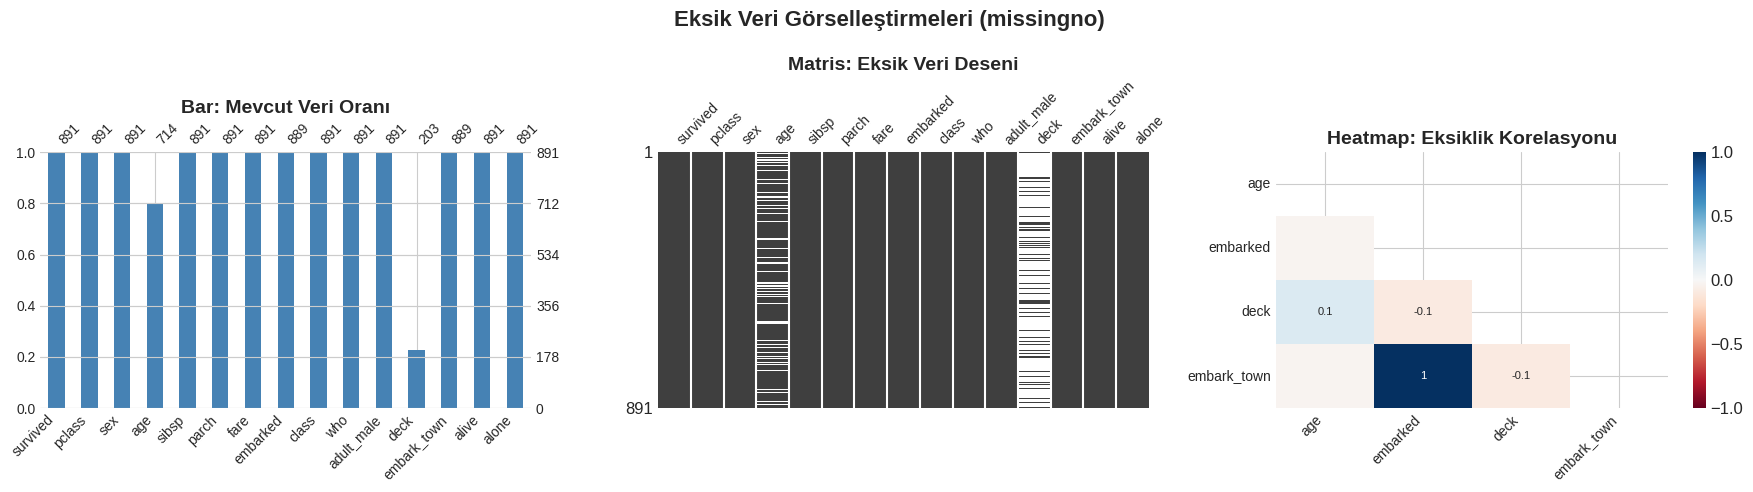

💡 Heatmap Yorumu:
   +1.0 → Her ikisi de aynı satırlarda eksik (pozitif ilişki)
   -1.0 → Birisi eksikken diğeri dolu (negatif ilişki)
    0   → Eksiklik örüntüleri bağımsız


In [13]:
# ── missingno kütüphanesi ile görselleştirme ────────────────
# missingno: Eksik veri örüntülerini görselleştirmek için özel kütüphane
# pip install missingno

if MISSINGNO_AVAILABLE:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Eksik Veri Görselleştirmeleri (missingno)', fontsize=16, fontweight='bold')

    # 1. BAR GRAFİĞİ: Her sütunda ne kadar veri var?
    plt.sca(axes[0])
    msno.bar(df, ax=axes[0], color='steelblue', fontsize=10)
    axes[0].set_title('Bar: Mevcut Veri Oranı')

    # 2. MATRİS: Eksik veri deseni (hangi satırlarda eksik var?)
    plt.sca(axes[1])
    msno.matrix(df, ax=axes[1], fontsize=10, sparkline=False)
    axes[1].set_title('Matris: Eksik Veri Deseni')

    # 3. HEATMAP: Sütunlar arasında eksiklik ilişkisi
    #    Yüksek korelasyon → aynı satırlarda birlikte eksik
    plt.sca(axes[2])
    msno.heatmap(df, ax=axes[2], fontsize=10)
    axes[2].set_title('Heatmap: Eksiklik Korelasyonu')

    plt.tight_layout()
    plt.show()

    print("💡 Heatmap Yorumu:")
    print("   +1.0 → Her ikisi de aynı satırlarda eksik (pozitif ilişki)")
    print("   -1.0 → Birisi eksikken diğeri dolu (negatif ilişki)")
    print("    0   → Eksiklik örüntüleri bağımsız")
else:
    print("⚠️ missingno kurulu değil. Kurulum: pip install missingno")
    # Alternatif: seaborn heatmap
    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
    plt.title('Eksik Veri Haritası (Sarı = Eksik)')
    plt.tight_layout()
    plt.show()

In [14]:
# ── Eksik veri imputation (doldurma) örnekleri ─────────────
# NOT: Bu hücre imputation yöntemlerini GÖSTERMEK içindir.
#      Orijinal df'yi değiştirmez — df_filled adlı kopyayı kullanır.

df_filled = df.copy()  # Orijinali koru

# Strateji 1: Sayısal değişkeni medyan ile doldur
#   Medyan, aykırı değerlere karşı dirençlidir — bu yüzden ortalamaya tercih edilir
if 'age' in df_filled.columns:
    medyan_yas = df_filled['age'].median()
    df_filled['age'] = df_filled['age'].fillna(medyan_yas)
    print(f"✅ 'age' sütunu medyan ({medyan_yas:.1f}) ile dolduruldu.")

# Strateji 2: Kategorik değişkeni mod ile doldur
#   En sık görülen kategori (mod) atanır
if 'embarked' in df_filled.columns:
    mod_liman = df_filled['embarked'].mode()[0]
    df_filled['embarked'] = df_filled['embarked'].fillna(mod_liman)
    print(f"✅ 'embarked' sütunu mod ('{mod_liman}') ile dolduruldu.")

# Strateji 3: Yüksek eksiklikli sütunu kaldır
#   'deck' sütununda %77 eksik → bilgi taşımıyor, daha çok gürültü
if 'deck' in df_filled.columns:
    eksik_oran = df_filled['deck'].isnull().mean() * 100
    if eksik_oran > 50:
        df_filled = df_filled.drop(columns=['deck'])
        print(f"🗑️  'deck' sütunu kaldırıldı (Eksik oranı: %{eksik_oran:.1f})")

# ── Önce-sonra karşılaştırması ─────────────────────────
print(f"\n📊 Eksik Değer Karşılaştırması:")
print(f"   Önce : {df.isnull().sum().sum():,} eksik hücre")
print(f"   Sonra: {df_filled.isnull().sum().sum():,} eksik hücre")

✅ 'age' sütunu medyan (28.0) ile dolduruldu.
✅ 'embarked' sütunu mod ('S') ile dolduruldu.
🗑️  'deck' sütunu kaldırıldı (Eksik oranı: %77.2)

📊 Eksik Değer Karşılaştırması:
   Önce : 869 eksik hücre
   Sonra: 2 eksik hücre


## 6. Tek Değişkenli Analiz (Univariate Analysis) <a id="6"></a>

**Tek değişkenli analiz**, her değişkeni **bağımsız** olarak incelememizi sağlar.

### 🎯 Bu Aşamada Ne Yapıyoruz?

- Sayısal değişkenler: Dağılım şekli, merkezi eğilim, yayılım
- Kategorik değişkenler: Frekans dağılımı, baskın kategoriler
- Her değişkenin "hikayesini" anlamak

### 📊 Sayısal Değişkenler İçin Önemli Kavramlar

| Kavram | Formül / Açıklama | Ne Söyler? |
|---|---|---|
| **Ortalama** | Σx / n | Merkezi eğilim (aykırılara duyarlı) |
| **Medyan** | Sıralı ortanca | Aykırılara dirençli merkez |
| **Std Sapma** | √Var | Ortalamadan ortalama sapma |
| **IQR** | Q3 - Q1 | Ortadaki %50'nin yayılımı |
| **Çarpıklık** | 3.(Ort-Medyan)/Std | Dağılım asimetri ölçüsü |
| **Basıklık** | Kuyruk ağırlığı | Sivrilik/basıklık ölçüsü |


══════════════════════════════════════════════════
  📊 age — Sayısal Değişken Analizi
══════════════════════════════════════════════════
  Gözlem Sayısı       : 714
  Ortalama            : 29.699
  Medyan              : 28.000
  Mod                 : 24.000
  Std Sapma           : 14.526
  Varyans             : 211.019
  Min                 : 0.420
  Maks                : 80.000
  Q1 (25%)            : 20.125
  Q3 (75%)            : 38.000
  IQR                 : 17.875
  Alt Sınır           : -6.688
  Üst Sınır           : 64.812
  Çarpıklık           : 0.389
  Basıklık            : 0.178

  🎯 Dağılım Yorumu:
     Yaklaşık normal dağılım (|çarpıklık| = 0.39 < 0.5)
     Aykırı değer (IQR): 11 adet (%1.5)


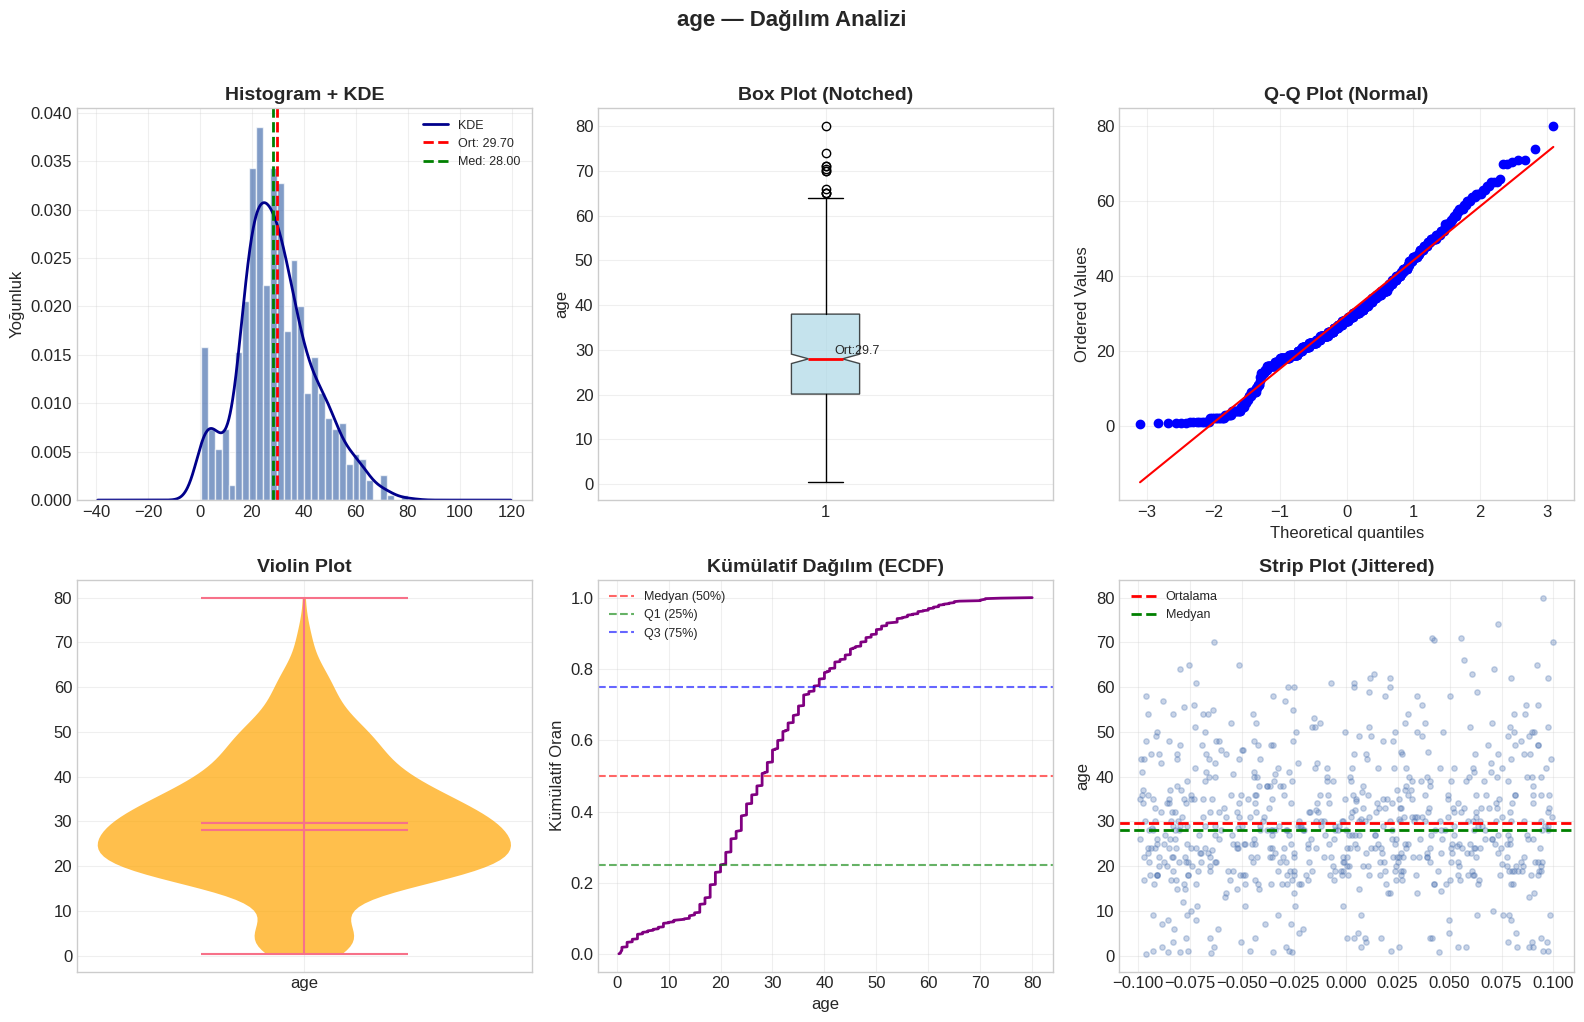

In [15]:
# ═══════════════════════════════════════════════════
# BÖLÜM 6: TEK DEĞİŞKENLİ ANALİZ
# ═══════════════════════════════════════════════════

def sayisal_tek_degisken_analizi(df, sutun):
    """
    Sayısal bir değişken için kapsamlı univariate analiz yapar.
    6 farklı grafik + istatistiksel özet üretir.
    """
    veri = df[sutun].dropna()

    # ── Temel istatistikler ──────────────────────────
    q1, q3 = veri.quantile(0.25), veri.quantile(0.75)
    iqr     = q3 - q1

    istatistik = {
        'Gözlem Sayısı' : len(veri),
        'Ortalama'      : veri.mean(),
        'Medyan'        : veri.median(),
        'Mod'           : veri.mode().iloc[0] if not veri.mode().empty else np.nan,
        'Std Sapma'     : veri.std(),
        'Varyans'       : veri.var(),
        'Min'           : veri.min(),
        'Maks'          : veri.max(),
        'Q1 (25%)'      : q1,
        'Q3 (75%)'      : q3,
        'IQR'           : iqr,
        'Alt Sınır'     : q1 - 1.5 * iqr,
        'Üst Sınır'     : q3 + 1.5 * iqr,
        'Çarpıklık'     : veri.skew(),
        'Basıklık'      : veri.kurtosis(),
    }

    print(f"\n{'═'*50}")
    print(f"  📊 {sutun} — Sayısal Değişken Analizi")
    print(f"{'═'*50}")

    for k, v in istatistik.items():
        print(f"  {k:20s}: {v:.3f}" if isinstance(v, float) else f"  {k:20s}: {v}")

    # ── Dağılım yorumu ──────────────────────────────
    carpiklik = veri.skew()
    print(f"\n  🎯 Dağılım Yorumu:")
    if abs(carpiklik) < 0.5:
        print(f"     Yaklaşık normal dağılım (|çarpıklık| = {abs(carpiklik):.2f} < 0.5)")
    elif abs(carpiklik) < 1:
        yön = "sağa" if carpiklik > 0 else "sola"
        print(f"     Orta düzeyde {yön} çarpık (|çarpıklık| = {abs(carpiklik):.2f})")
    else:
        yön = "sağa" if carpiklik > 0 else "sola"
        print(f"     ⚠️ Yüksek {yön} çarpıklık (|çarpıklık| = {abs(carpiklik):.2f}) → dönüşüm gerekebilir")

    # Aykırı değer sayısı (IQR yöntemi)
    alt_sinir = q1 - 1.5 * iqr
    ust_sinir = q3 + 1.5 * iqr
    aykirilar = veri[(veri < alt_sinir) | (veri > ust_sinir)]
    print(f"     Aykırı değer (IQR): {len(aykirilar)} adet (%{len(aykirilar)/len(veri)*100:.1f})")

    # ── 6 panelli görselleştirme ─────────────────────
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle(f'{sutun} — Dağılım Analizi', fontsize=16, fontweight='bold', y=1.02)

    renk = '#4C72B0'

    # 1. Histogram + KDE + Ortalama/Medyan çizgileri
    axes[0,0].hist(veri, bins=30, alpha=0.7, color=renk, edgecolor='white', density=True)
    veri.plot.kde(ax=axes[0,0], color='darkblue', linewidth=2, label='KDE')
    axes[0,0].axvline(veri.mean(),   color='red',    ls='--', lw=2, label=f'Ort: {veri.mean():.2f}')
    axes[0,0].axvline(veri.median(), color='green',  ls='--', lw=2, label=f'Med: {veri.median():.2f}')
    axes[0,0].set_title('Histogram + KDE')
    axes[0,0].set_ylabel('Yoğunluk')
    axes[0,0].legend(fontsize=9)
    axes[0,0].grid(True, alpha=0.3)

    # 2. Box Plot — IQR ve aykırıları gösterir
    bp = axes[0,1].boxplot(veri, patch_artist=True, notch=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2))
    axes[0,1].set_title('Box Plot (Notched)')
    axes[0,1].set_ylabel(sutun)
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].text(1.02, veri.mean(), f'Ort:{veri.mean():.1f}', va='center', fontsize=9)

    # 3. Q-Q Plot — Normal dağılımla karşılaştırma
    #    Noktalar doğru üzerindeyse → normal dağılım
    stats.probplot(veri, dist="norm", plot=axes[0,2])
    axes[0,2].set_title('Q-Q Plot (Normal)')
    axes[0,2].grid(True, alpha=0.3)

    # 4. Violin Plot — Box plot + KDE birleşimi
    parts = axes[1,0].violinplot([veri.values], positions=[1],
                                  showmeans=True, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor('orange')
        pc.set_alpha(0.7)
    axes[1,0].set_title('Violin Plot')
    axes[1,0].set_xticks([1])
    axes[1,0].set_xticklabels([sutun])
    axes[1,0].grid(True, alpha=0.3)

    # 5. Kümülatif Dağılım (ECDF) — hangi yüzde hangi değerin altında?
    siralanmis = np.sort(veri)
    kumulatif  = np.arange(1, len(siralanmis)+1) / len(siralanmis)
    axes[1,1].plot(siralanmis, kumulatif, color='purple', linewidth=2)
    axes[1,1].axhline(0.5,  color='red',   ls='--', alpha=0.6, label='Medyan (50%)')
    axes[1,1].axhline(0.25, color='green', ls='--', alpha=0.6, label='Q1 (25%)')
    axes[1,1].axhline(0.75, color='blue',  ls='--', alpha=0.6, label='Q3 (75%)')
    axes[1,1].set_title('Kümülatif Dağılım (ECDF)')
    axes[1,1].set_xlabel(sutun)
    axes[1,1].set_ylabel('Kümülatif Oran')
    axes[1,1].legend(fontsize=9)
    axes[1,1].grid(True, alpha=0.3)

    # 6. Strip + Swarm Plot — tüm noktalar görünür
    np.random.seed(42)
    jitter = np.random.uniform(-0.1, 0.1, size=len(veri))
    axes[1,2].scatter(jitter, veri, alpha=0.3, color=renk, s=15)
    axes[1,2].axhline(veri.mean(),   color='red',   ls='--', lw=2, label='Ortalama')
    axes[1,2].axhline(veri.median(), color='green', ls='--', lw=2, label='Medyan')
    axes[1,2].set_title('Strip Plot (Jittered)')
    axes[1,2].set_ylabel(sutun)
    axes[1,2].legend(fontsize=9)
    axes[1,2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Titanic'te 'age' sütunu için analiz
sayisal_tek_degisken_analizi(df, 'age')

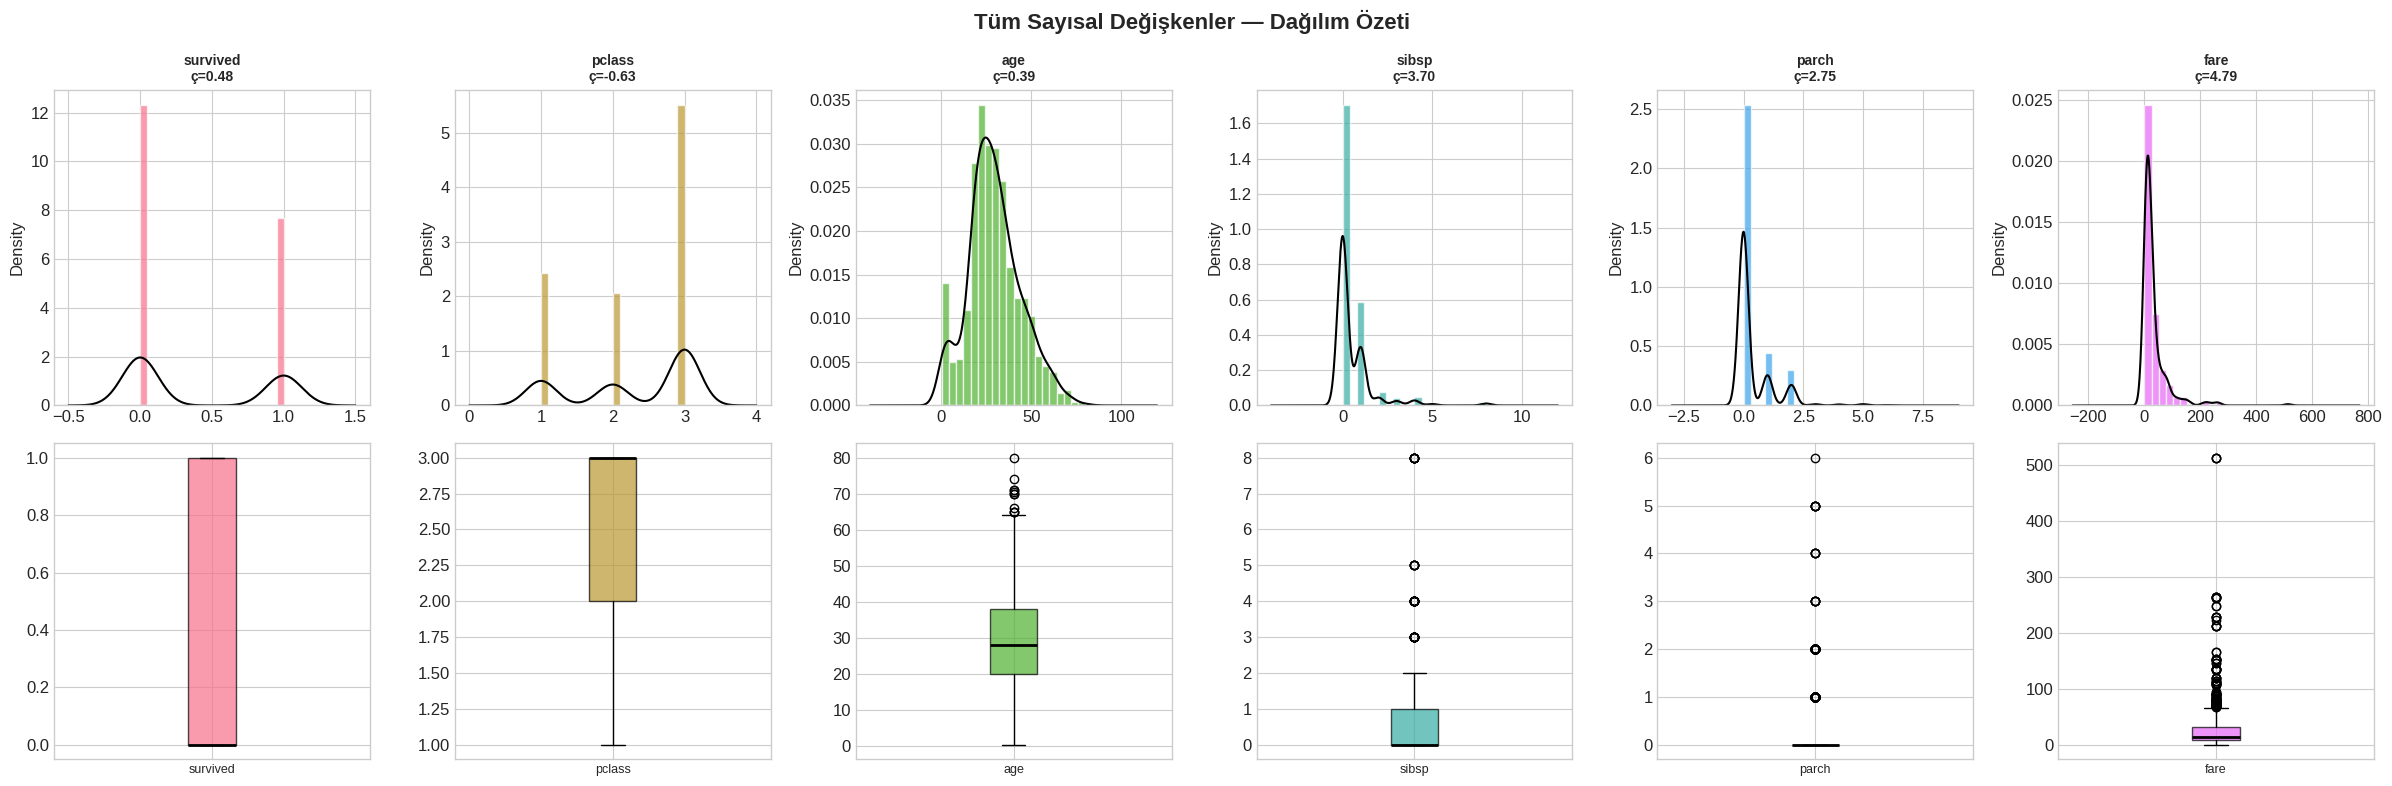


💡 Çarpıklık (ç) rehberi:
   |ç| < 0.5  → Normal dağılım
   0.5 < |ç| < 1.0 → Orta çarpık
   |ç| > 1.0  → Yüksek çarpık (log dönüşümü düşünün)


In [16]:
# ── Tüm sayısal değişkenleri toplu görselleştir ─────────────
# Dağılımları karşılaştırmalı olarak görmek için iyi bir yöntem

sayisal_sutunlar = df.select_dtypes(include=np.number).columns.tolist()
n = len(sayisal_sutunlar)

fig, axes = plt.subplots(2, n, figsize=(n * 4, 8))
fig.suptitle('Tüm Sayısal Değişkenler — Dağılım Özeti', fontsize=16, fontweight='bold')

renkler = sns.color_palette("husl", n)

for i, sutun in enumerate(sayisal_sutunlar):
    veri = df[sutun].dropna()

    # Üst satır: Histogram + KDE
    axes[0, i].hist(veri, bins=20, alpha=0.7, color=renkler[i], edgecolor='white', density=True)
    veri.plot.kde(ax=axes[0, i], color='black', linewidth=1.5)
    axes[0, i].set_title(f'{sutun}\nç={veri.skew():.2f}', fontsize=10)
    axes[0, i].set_xlabel('')

    # Alt satır: Box Plot
    bp = axes[1, i].boxplot(veri, patch_artist=True,
                             boxprops=dict(facecolor=renkler[i], alpha=0.7),
                             medianprops=dict(color='black', linewidth=2))
    axes[1, i].set_xticklabels([sutun], fontsize=9)

plt.tight_layout()
plt.show()

print("\n💡 Çarpıklık (ç) rehberi:")
print("   |ç| < 0.5  → Normal dağılım")
print("   0.5 < |ç| < 1.0 → Orta çarpık")
print("   |ç| > 1.0  → Yüksek çarpık (log dönüşümü düşünün)")


📊 sex — Kategorik Frekans Tablosu:


,Frekans,Oran_%,Kümülatif_%
sex,,,
male,577,64.76,64.76
female,314,35.24,100.00



  Shannon Entropy : 0.936 (max: 1.000)
  Gini Katsayısı  : 0.456 (0: tekdüze, 1: eşit)


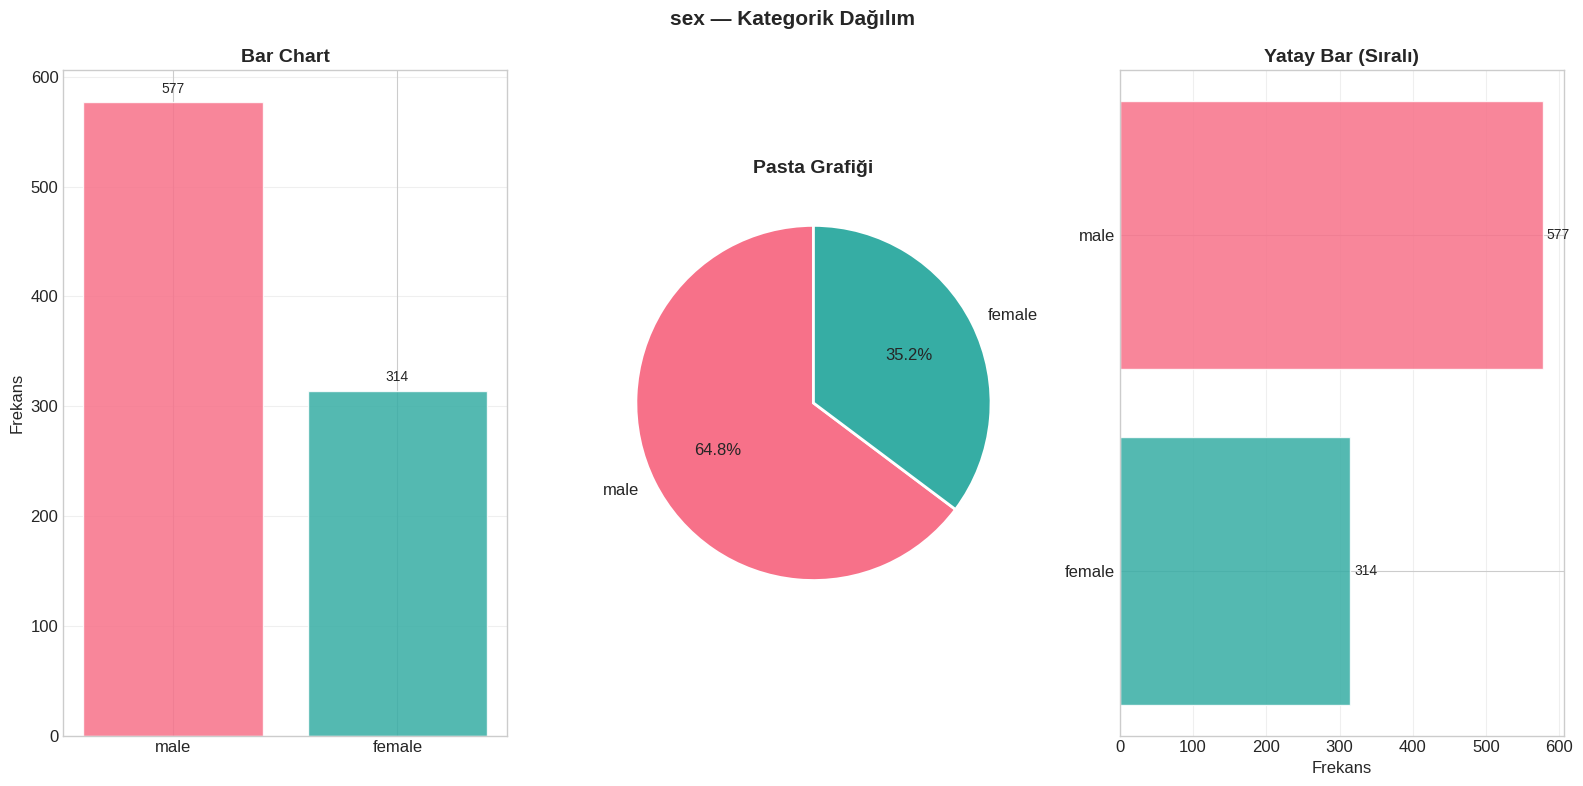


📊 pclass — Kategorik Frekans Tablosu:


,Frekans,Oran_%,Kümülatif_%
pclass,,,
3,491,55.11,55.11
1,216,24.24,79.35
2,184,20.65,100.00



  Shannon Entropy : 1.439 (max: 1.585)
  Gini Katsayısı  : 0.595 (0: tekdüze, 1: eşit)


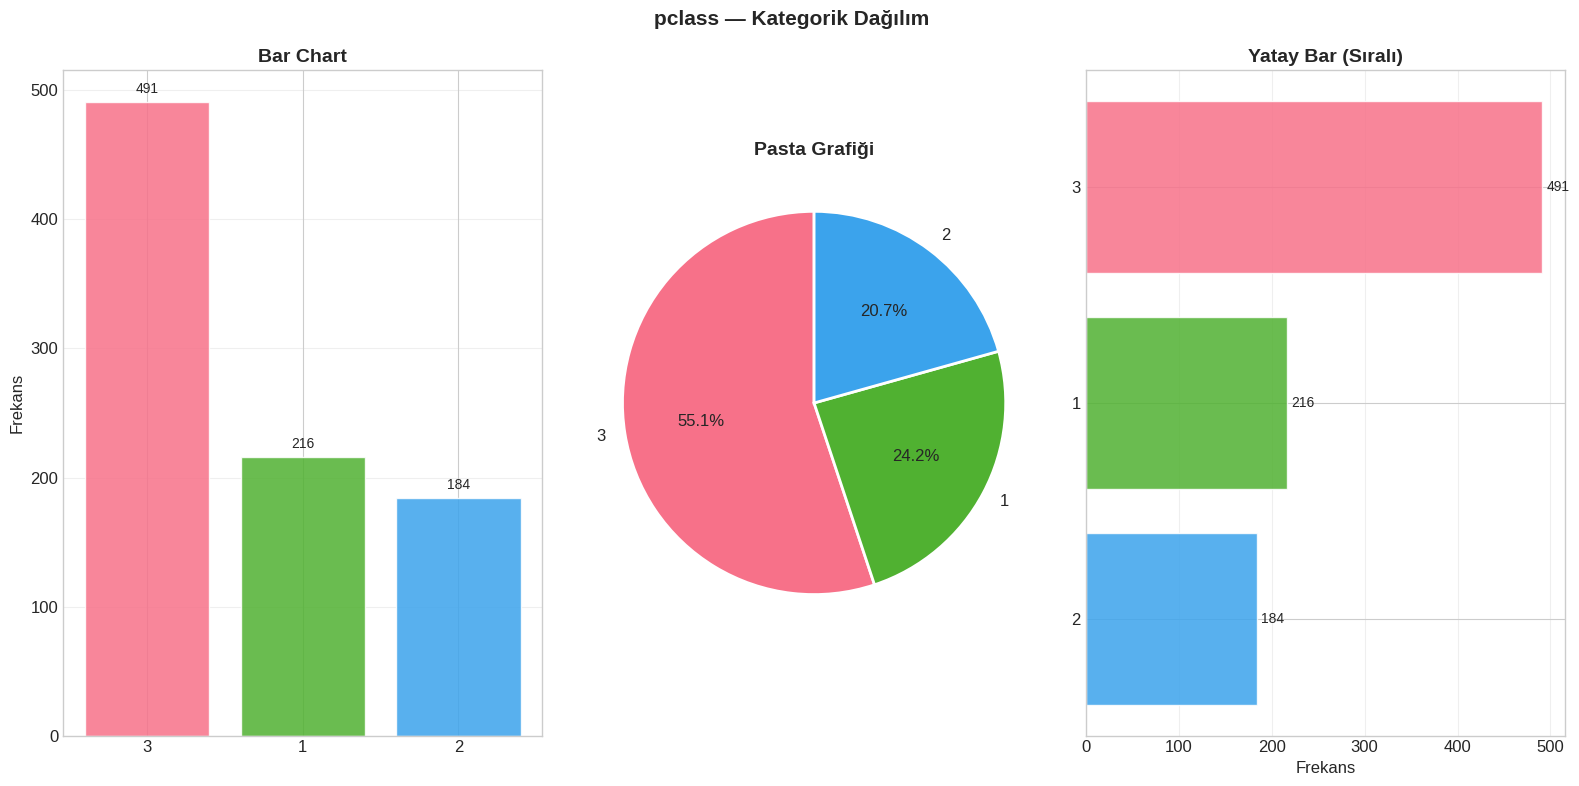

In [17]:
# ── Kategorik değişken analizi ──────────────────────────────

def kategorik_tek_degisken(df, sutun, figsize=(16, 8)):
    """Kategorik değişken için frekans tablosu + görselleştirme."""
    veri = df[sutun].dropna()

    # Frekans tablosu
    frekans = pd.DataFrame({
        'Frekans'         : veri.value_counts(),
        'Oran_%'          : veri.value_counts(normalize=True).mul(100).round(2),
        'Kümülatif_%'     : veri.value_counts(normalize=True).mul(100).cumsum().round(2)
    })

    print(f"\n📊 {sutun} — Kategorik Frekans Tablosu:")
    display(frekans)

    # Çeşitlilik metrikleri
    oranlar = veri.value_counts(normalize=True).values
    entropy = -np.sum(oranlar * np.log2(oranlar + 1e-10))
    gini    = 1 - np.sum(oranlar**2)
    print(f"\n  Shannon Entropy : {entropy:.3f} (max: {np.log2(len(oranlar)):.3f})")
    print(f"  Gini Katsayısı  : {gini:.3f} (0: tekdüze, 1: eşit)")

    # Görselleştirme: 3 grafik
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(f'{sutun} — Kategorik Dağılım', fontsize=15, fontweight='bold')

    renkler = sns.color_palette("husl", len(veri.value_counts()))

    # 1. Bar Chart (frekans)
    bar = veri.value_counts()
    axes[0].bar(bar.index.astype(str), bar.values, color=renkler, edgecolor='white', alpha=0.85)
    for j, v in enumerate(bar.values):
        axes[0].text(j, v + bar.values.max()*0.01, str(v), ha='center', va='bottom', fontsize=10)
    axes[0].set_title('Bar Chart')
    axes[0].set_ylabel('Frekans')
    axes[0].grid(True, alpha=0.3, axis='y')

    # 2. Pie Chart (oran)
    axes[1].pie(bar.values, labels=bar.index.astype(str),
                autopct='%1.1f%%', colors=renkler, startangle=90,
                wedgeprops=dict(edgecolor='white', linewidth=2))
    axes[1].set_title('Pasta Grafiği')

    # 3. Horizontal Bar (sıralı)
    bar_s = bar.sort_values()
    axes[2].barh(bar_s.index.astype(str), bar_s.values, color=renkler[::-1], edgecolor='white', alpha=0.85)
    for j, v in enumerate(bar_s.values):
        axes[2].text(v + bar_s.values.max()*0.01, j, str(v), va='center', fontsize=10)
    axes[2].set_title('Yatay Bar (Sıralı)')
    axes[2].set_xlabel('Frekans')
    axes[2].grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    plt.show()

# Cinsiyet ve bilet sınıfı için analiz
if 'sex' in df.columns:
    kategorik_tek_degisken(df, 'sex')

if 'pclass' in df.columns:
    kategorik_tek_degisken(df, 'pclass')

## 7. İki Değişkenli Analiz (Bivariate Analysis) <a id="7"></a>

İki değişkeni **birlikte** incelediğimizde aralarındaki **ilişkileri** anlarız.

### 🔗 Analiz Senaryoları

| Değişken 1 | Değişken 2 | Kullanılacak Yöntem |
|---|---|---|
| Sayısal | Sayısal | Scatter plot, Pearson/Spearman korelasyon |
| Sayısal | Kategorik | Box/Violin plot, t-test, ANOVA |
| Kategorik | Kategorik | Çapraz tablo, Ki-kare, Heatmap |

---

### 📌 Korelasyon Yorumu (Pearson r)

| r değeri | Yorum |
|---|---|
| 0.00 – 0.19 | Çok zayıf |
| 0.20 – 0.39 | Zayıf |
| 0.40 – 0.59 | Orta |
| 0.60 – 0.79 | Güçlü |
| 0.80 – 1.00 | Çok güçlü |

> ⚠️ **"Korelasyon nedensellik değildir!"** — İki değişken ilişkili görünse de aralarında gizli bir üçüncü değişken olabilir.


📊 age ↔ fare — İlişki Analizi
──────────────────────────────────────────────────
  Pearson r     : 0.0961  (p=0.0102  ✅ Anlamlı)
  Spearman r    : 0.1351  (p=0.0003  ✅ Anlamlı)
  n (gözlem)    : 714


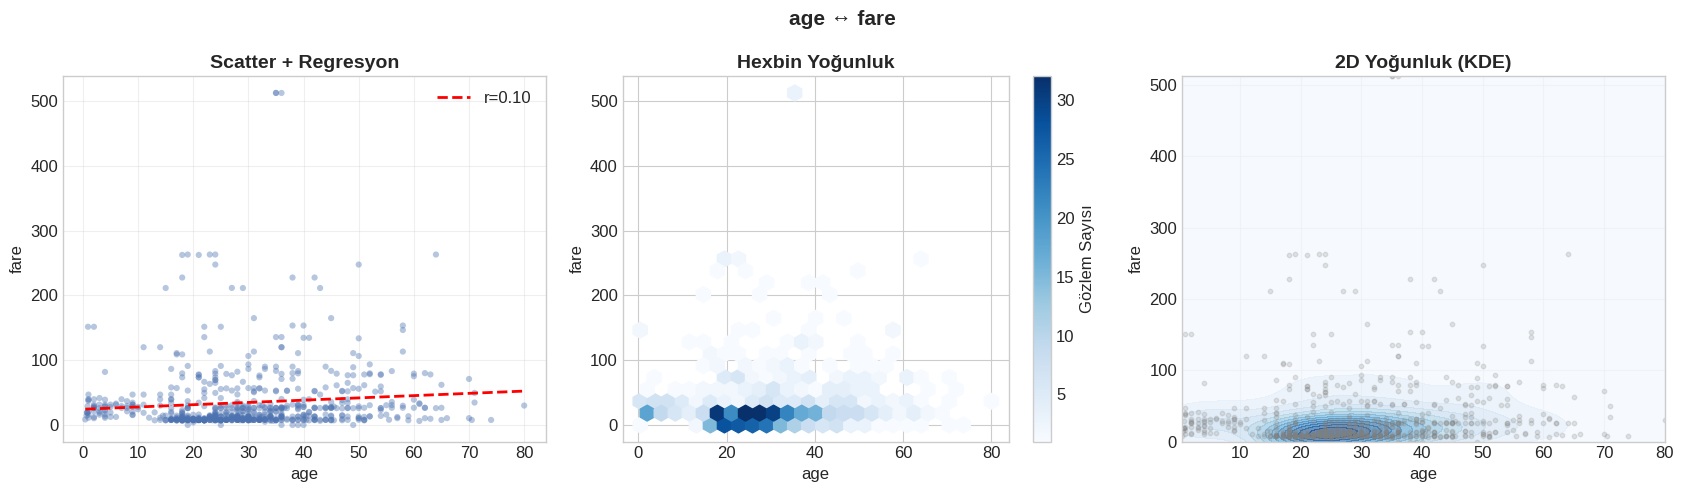

In [18]:
# ═══════════════════════════════════════════════════
# BÖLÜM 7: İKİ DEĞİŞKENLİ ANALİZ
# ═══════════════════════════════════════════════════

# ─── 7A. SAYISAL vs SAYISAL ─────────────────────────────

def sayisal_sayisal_analiz(df, x_sutun, y_sutun):
    """İki sayısal değişken arasındaki ilişkiyi analiz eder."""

    # Eksik değerleri temizle
    temiz = df[[x_sutun, y_sutun]].dropna()
    x, y  = temiz[x_sutun], temiz[y_sutun]

    # Korelasyon katsayıları
    pearson_r,  pearson_p  = pearsonr(x, y)
    spearman_r, spearman_p = spearmanr(x, y)

    print(f"\n📊 {x_sutun} ↔ {y_sutun} — İlişki Analizi")
    print(f"{'─'*50}")
    print(f"  Pearson r     : {pearson_r:.4f}  (p={pearson_p:.4f}{'  ✅ Anlamlı' if pearson_p < 0.05 else '  ❌ Anlamsız'})")
    print(f"  Spearman r    : {spearman_r:.4f}  (p={spearman_p:.4f}{'  ✅ Anlamlı' if spearman_p < 0.05 else '  ❌ Anlamsız'})")
    print(f"  n (gözlem)    : {len(temiz)}")

    # Görselleştirme
    fig, axes = plt.subplots(1, 3, figsize=(17, 5))
    fig.suptitle(f'{x_sutun} ↔ {y_sutun}', fontsize=15, fontweight='bold')

    # 1. Scatter + Regresyon doğrusu
    axes[0].scatter(x, y, alpha=0.4, color='#4C72B0', s=20, edgecolors='none')
    # Regresyon doğrusu
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    xs = np.linspace(x.min(), x.max(), 100)
    axes[0].plot(xs, p(xs), 'r--', lw=2, label=f'r={pearson_r:.2f}')
    axes[0].set_xlabel(x_sutun)
    axes[0].set_ylabel(y_sutun)
    axes[0].set_title('Scatter + Regresyon')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # 2. Hexbin yoğunluk — çok nokta varsa scatter yetersiz kalır
    hb = axes[1].hexbin(x, y, gridsize=25, cmap='Blues', mincnt=1)
    plt.colorbar(hb, ax=axes[1], label='Gözlem Sayısı')
    axes[1].set_xlabel(x_sutun)
    axes[1].set_ylabel(y_sutun)
    axes[1].set_title('Hexbin Yoğunluk')

    # 3. 2D KDE yoğunluk haritası
    axes[2].scatter(x, y, alpha=0.2, color='gray', s=10, zorder=2)
    try:
        import scipy.stats as scipy_stats
        xi, yi = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
        zi = scipy_stats.gaussian_kde(np.vstack([x, y]))(np.vstack([xi.ravel(), yi.ravel()]))
        axes[2].contourf(xi, yi, zi.reshape(xi.shape), levels=12, cmap='Blues', alpha=0.6)
    except Exception:
        axes[2].scatter(x, y, alpha=0.4, c=np.sqrt(x**2 + y**2), cmap='viridis', s=15)
    axes[2].set_xlabel(x_sutun)
    axes[2].set_ylabel(y_sutun)
    axes[2].set_title('2D Yoğunluk (KDE)')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Titanic: yaş ve ücret arasındaki ilişki
if 'age' in df.columns and 'fare' in df.columns:
    sayisal_sayisal_analiz(df, 'age', 'fare')


📊 fare ↔ sex
──────────────────────────────────────────────────


,Ort,Medyan,Std,n
sex,,,,
female,44.480,23.0,57.998,314
male,25.524,10.5,43.138,577



  Mann-Whitney U: stat=62175.000, p=0.0000  → ✅ Anlamlı fark VAR (α=0.05)


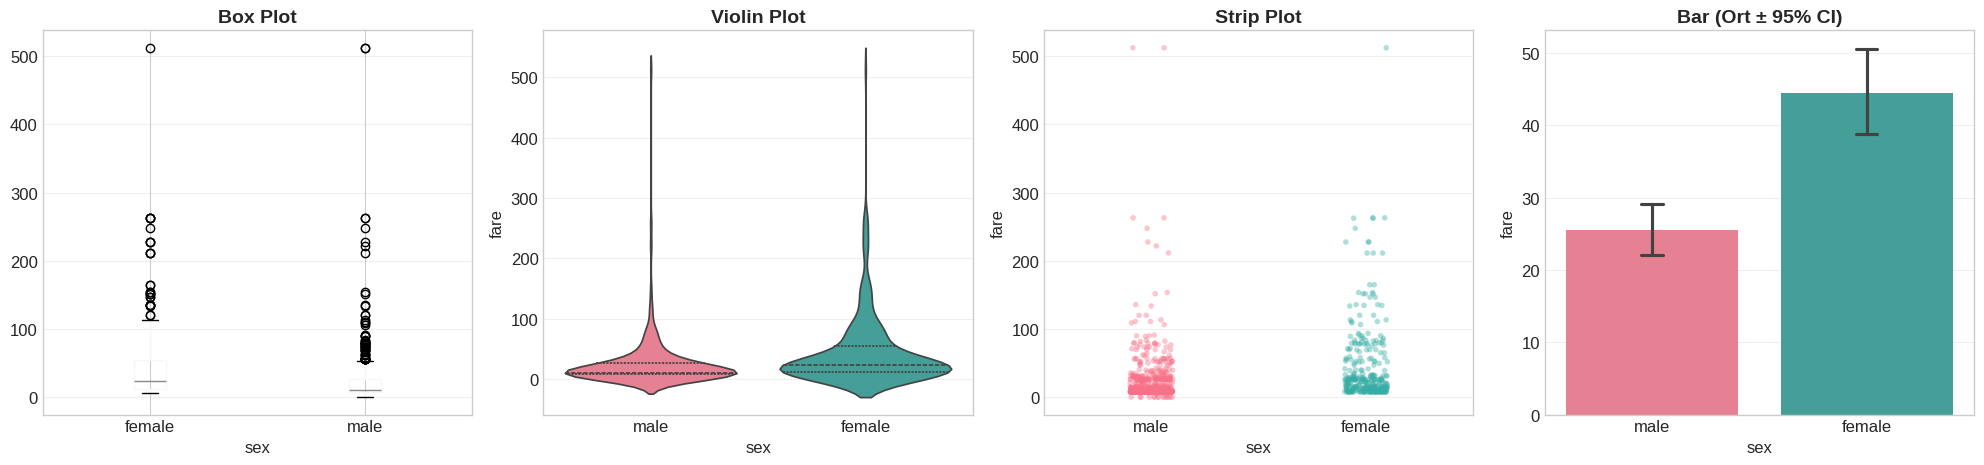


📊 age ↔ survived_str
──────────────────────────────────────────────────


,Ort,Medyan,Std,n
survived_str,,,,
Hayatını Kaybetti,30.626,28.0,14.172,424
Kurtuldu,28.344,28.0,14.951,290



  Mann-Whitney U: stat=65278.000, p=0.1605  → ❌ Anlamlı fark YOK (α=0.05)


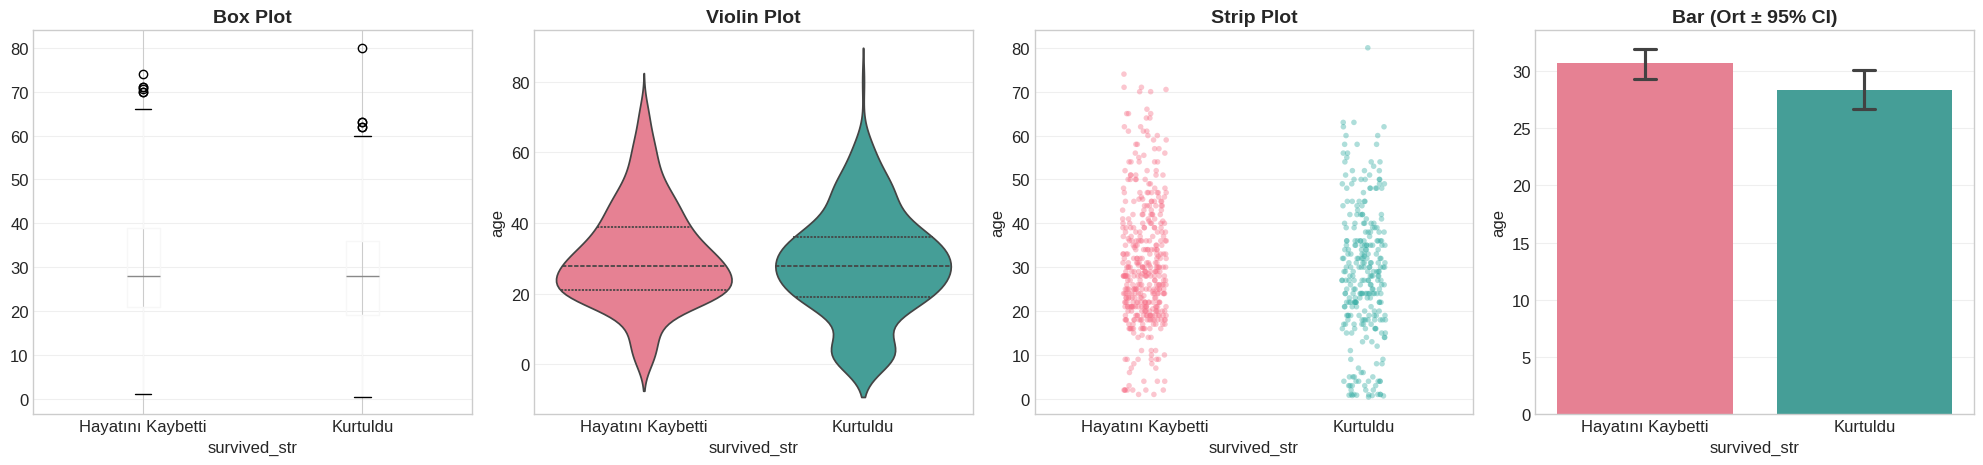

In [19]:
# ─── 7B. SAYISAL vs KATEGORİK ───────────────────────────────

def sayisal_kategorik_analiz(df, sayisal_sutun, kategorik_sutun):
    """Sayısal ve kategorik değişken arasındaki ilişkiyi analiz eder."""

    temiz = df[[sayisal_sutun, kategorik_sutun]].dropna()
    kategoriler = temiz[kategorik_sutun].unique()
    gruplar = [temiz[temiz[kategorik_sutun]==k][sayisal_sutun].values for k in kategoriler]

    # Grup istatistikleri
    print(f"\n📊 {sayisal_sutun} ↔ {kategorik_sutun}")
    print(f"{'─'*50}")
    ozet = temiz.groupby(kategorik_sutun)[sayisal_sutun].agg(['mean','median','std','count'])
    ozet.columns = ['Ort', 'Medyan', 'Std', 'n']
    display(ozet.round(3))

    # İstatistiksel test
    if len(kategoriler) == 2:
        g1, g2 = gruplar[0], gruplar[1]
        _, p_norm1 = shapiro(g1[:50] if len(g1)>50 else g1)
        _, p_norm2 = shapiro(g2[:50] if len(g2)>50 else g2)

        if p_norm1 > 0.05 and p_norm2 > 0.05:
            stat, p = ttest_ind(g1, g2)
            test_adi = "t-testi"
        else:
            stat, p = mannwhitneyu(g1, g2)
            test_adi = "Mann-Whitney U"

        sonuc = "✅ Anlamlı fark VAR" if p < 0.05 else "❌ Anlamlı fark YOK"
        print(f"\n  {test_adi}: stat={stat:.3f}, p={p:.4f}  → {sonuc} (α=0.05)")

    elif len(kategoriler) > 2:
        stat, p = f_oneway(*gruplar)
        sonuc = "✅ Anlamlı fark VAR" if p < 0.05 else "❌ Anlamlı fark YOK"
        print(f"\n  One-way ANOVA: F={stat:.3f}, p={p:.4f}  → {sonuc} (α=0.05)")

    # 4 panelli görselleştirme
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'{sayisal_sutun} dağılımı ~ {kategorik_sutun}', fontsize=14, fontweight='bold')

    renkler = sns.color_palette("husl", len(kategoriler))

    # 1. Box Plot
    temiz.boxplot(column=sayisal_sutun, by=kategorik_sutun, ax=axes[0])
    axes[0].set_title('Box Plot')
    plt.sca(axes[0]); plt.suptitle('')

    # 2. Violin Plot
    sns.violinplot(data=temiz, x=kategorik_sutun, y=sayisal_sutun,
                   palette='husl', inner='quartile', ax=axes[1])
    axes[1].set_title('Violin Plot')

    # 3. Strip Plot (tüm noktalar görünür)
    sns.stripplot(data=temiz, x=kategorik_sutun, y=sayisal_sutun,
                  palette='husl', alpha=0.4, jitter=True, size=4, ax=axes[2])
    axes[2].set_title('Strip Plot')

    # 4. Bar Plot (ortalama + güven aralığı)
    sns.barplot(data=temiz, x=kategorik_sutun, y=sayisal_sutun,
                palette='husl', capsize=0.1, ax=axes[3], ci=95)
    axes[3].set_title('Bar (Ort ± 95% CI)')

    for ax in axes:
        ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

# Ücret ~ Cinsiyet
if 'fare' in df.columns and 'sex' in df.columns:
    sayisal_kategorik_analiz(df, 'fare', 'sex')

# Yaş ~ Hayatta Kalma
if 'age' in df.columns and 'survived' in df.columns:
    df_temp = df.copy()
    df_temp['survived_str'] = df_temp['survived'].map({0: 'Hayatını Kaybetti', 1: 'Kurtuldu'})
    sayisal_kategorik_analiz(df_temp, 'age', 'survived_str')


📊 sex ↔ survived_str
──────────────────────────────────────────────────
  Gözlem Tablosu (Frekans):


survived_str,Hayatını Kaybetti,Kurtuldu
sex,,
female,81,233
male,468,109


  Satır Yüzdesi (%):


survived_str,Hayatını Kaybetti,Kurtuldu
sex,,
female,25.8,74.2
male,81.1,18.9



  Ki-kare testi: χ²=260.717, df=1, p=0.0000
  ✅ Bağımlılık VAR (α=0.05)
  Cramér's V (etki büyüklüğü): 0.541
  Yorum: Güçlü ilişki


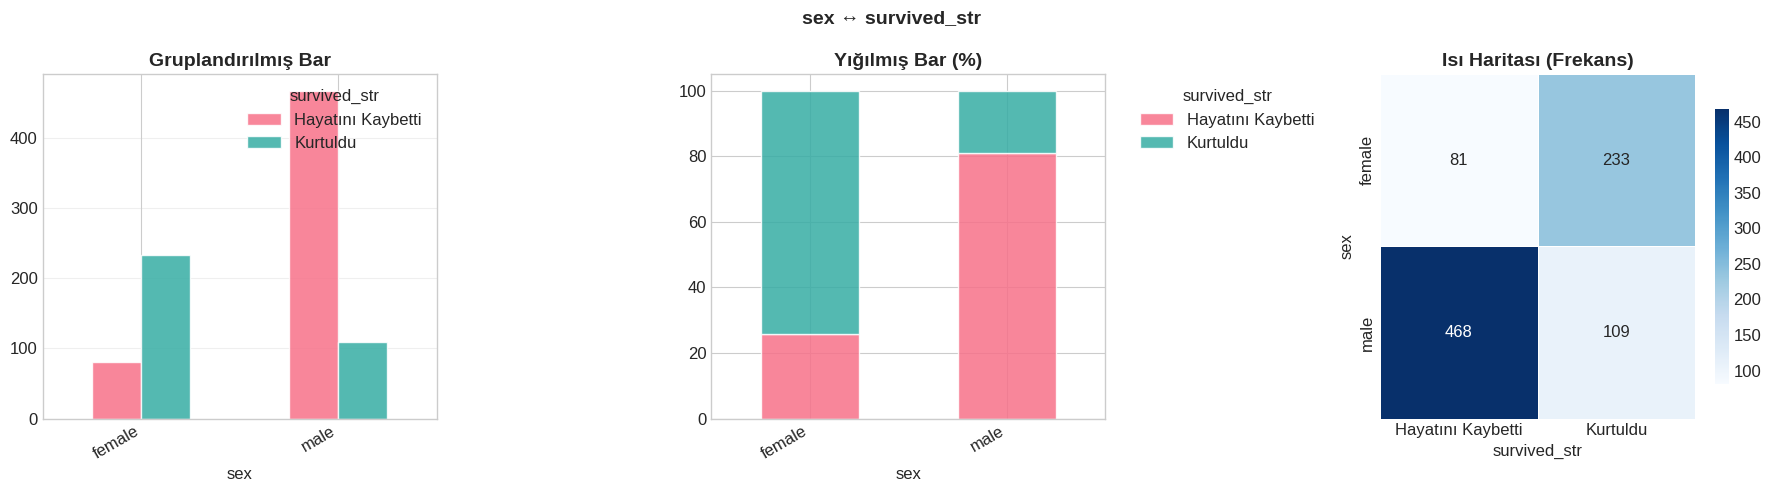

In [25]:
# ─── 7C. KATEGORİK vs KATEGORİK ────────────────────────────

def kategorik_kategorik_analiz(df, sutun1, sutun2):
    """İki kategorik değişken arasındaki ilişkiyi analiz eder."""

    temiz = df[[sutun1, sutun2]].dropna()

    # Çapraz tablo (contingency table)
    capraz = pd.crosstab(temiz[sutun1], temiz[sutun2])
    capraz_pct = pd.crosstab(temiz[sutun1], temiz[sutun2], normalize='index').mul(100).round(1)

    print(f"\n📊 {sutun1} ↔ {sutun2}")
    print(f"{'─'*50}")
    print("  Gözlem Tablosu (Frekans):")
    display(capraz)
    print("  Satır Yüzdesi (%):")
    display(capraz_pct)

    # Ki-kare bağımsızlık testi
    chi2, p, dof, expected = chi2_contingency(capraz)

    # Cramér's V — etki büyüklüğü
    n_total = capraz.values.sum()
    k        = min(capraz.shape) - 1
    cramers_v = np.sqrt(chi2 / (n_total * k)) if k > 0 else 0

    print(f"\n  Ki-kare testi: χ²={chi2:.3f}, df={dof}, p={p:.4f}")
    print(f"  {'✅ Bağımlılık VAR' if p<0.05 else '❌ Bağımlılık YOK'} (α=0.05)")
    print(f"  Cramér's V (etki büyüklüğü): {cramers_v:.3f}")
    print(f"  Yorum: {'Güçlü' if cramers_v>0.5 else 'Orta' if cramers_v>0.3 else 'Zayıf'} ilişki")

    # Görselleştirme
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{sutun1} ↔ {sutun2}', fontsize=14, fontweight='bold')

    # 1. Grouped Bar Chart
    #capraz.plot(kind='bar', ax=axes[0], colormap='husl', edgecolor='white', alpha=0.85)
    capraz.plot(kind='bar', color=sns.color_palette('husl', len(capraz.columns)), ax=axes[0], edgecolor='white', alpha=0.85)
    axes[0].set_title('Gruplandırılmış Bar')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha='right')
    axes[0].legend(title=sutun2, loc='upper right')
    axes[0].grid(True, alpha=0.3, axis='y')

    # 2. Stacked Bar (yüzde)
    #capraz_pct.plot(kind='bar', stacked=True, ax=axes[1], colormap='husl', edgecolor='white', alpha=0.85)
    capraz_pct.plot(kind='bar', color=sns.color_palette('husl', len(capraz.columns)), stacked=True, ax=axes[1], edgecolor='white', alpha=0.85)
    axes[1].set_title('Yığılmış Bar (%)')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha='right')
    axes[1].legend(title=sutun2, bbox_to_anchor=(1.05, 1))

    # 3. Heatmap (frekans)
    sns.heatmap(capraz, annot=True, fmt='d', cmap='Blues',
                linewidths=0.5, ax=axes[2], cbar_kws={'shrink': 0.8})
    axes[2].set_title('Isı Haritası (Frekans)')

    plt.tight_layout()
    plt.show()

# Cinsiyet ~ Hayatta Kalma
if 'sex' in df.columns and 'survived' in df.columns:
    df_temp2 = df.copy()
    df_temp2['survived_str'] = df_temp2['survived'].map({0:'Hayatını Kaybetti', 1:'Kurtuldu'})
    kategorik_kategorik_analiz(df_temp2, 'sex', 'survived_str')

## 8. Çok Değişkenli Analiz (Multivariate Analysis) <a id="8"></a>

Birden fazla değişkeni **aynı anda** inceleyerek karmaşık ilişkileri ortaya çıkarırız.

### 🔍 Kullanılan Teknikler

- **Korelasyon Matrisi**: Tüm sayısal değişkenler arasındaki korelasyon
- **Pair Plot**: İkili scatter ve dağılım grafikleri
- **PCA**: Boyut indirgeme (yüksek boyutlu veriyi 2D/3D'ye indirme)
- **Parallel Coordinates**: Çok değişkenli gruplama görselleştirmesi
- **Scatter Matrix**: Plotly ile interaktif

> 💡 **PCA Nedir?** Principal Component Analysis (Ana Bileşenler Analizi):  
> Yüksek boyutlu veriyi en fazla varyansı açıklayan yeni eksenler (PC) üzerine yansıtır.  
> Görselleştirme, boyut indirgeme ve özellik seçiminde kullanılır.

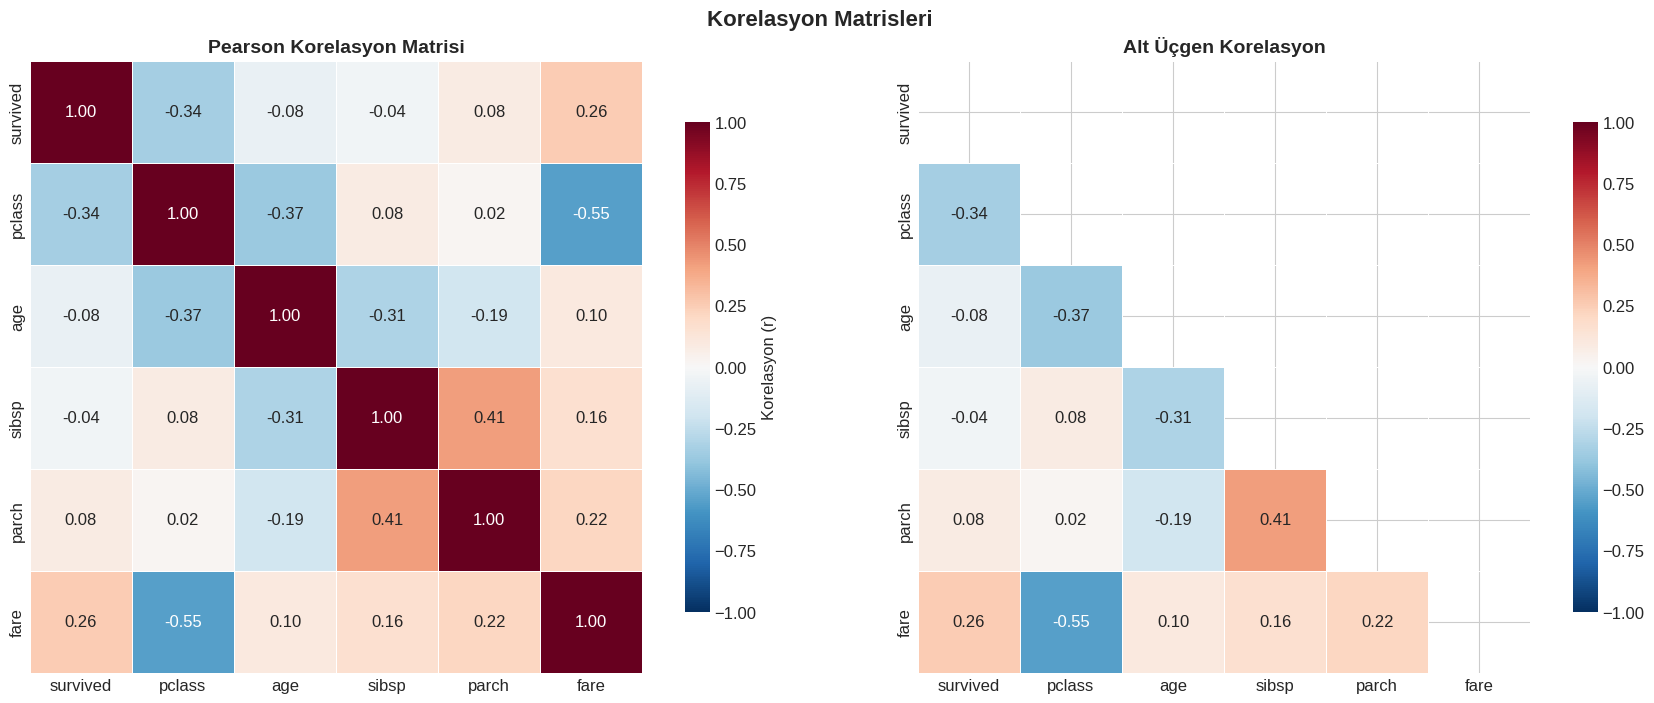


🔗 Güçlü Korelasyonlar (|r| ≥ 0.3):
───────────────────────────────────────────────────────
  survived   ↔ pclass      r=-0.338  [Orta negatif ↓]
  pclass     ↔ age         r=-0.369  [Orta negatif ↓]
  pclass     ↔ fare        r=-0.549  [Orta negatif ↓]
  age        ↔ sibsp       r=-0.308  [Orta negatif ↓]
  sibsp      ↔ parch       r=+0.415  [Orta pozitif ↑]


In [26]:
# ═══════════════════════════════════════════════════
# BÖLÜM 8: ÇOK DEĞİŞKENLİ ANALİZ
# ═══════════════════════════════════════════════════

# ─── 8A. KORELASYON MATRİSİ ─────────────────────────────

sayisal_sutunlar = df.select_dtypes(include=np.number).columns.tolist()
korelasyon = df[sayisal_sutunlar].corr()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Korelasyon Matrisleri', fontsize=16, fontweight='bold')

# 1. Tam korelasyon heatmap
sns.heatmap(korelasyon, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, ax=axes[0],
            square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Korelasyon (r)'})
axes[0].set_title('Pearson Korelasyon Matrisi')

# 2. Üçgen korelasyon (tekrar eden bilgiyi gizle)
maske = np.triu(np.ones_like(korelasyon, dtype=bool))
sns.heatmap(korelasyon, mask=maske, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, ax=axes[1],
            square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8})
axes[1].set_title('Alt Üçgen Korelasyon')

plt.tight_layout()
plt.show()

# Güçlü korelasyonları listele
print("\n🔗 Güçlü Korelasyonlar (|r| ≥ 0.3):")
print(f"{'─'*55}")
for i in range(len(korelasyon.columns)):
    for j in range(i+1, len(korelasyon.columns)):
        r = korelasyon.iloc[i, j]
        if abs(r) >= 0.3:
            yon  = "pozitif ↑" if r > 0 else "negatif ↓"
            guc  = "Çok Güçlü" if abs(r)>0.8 else "Güçlü" if abs(r)>0.6 else "Orta"
            print(f"  {korelasyon.columns[i]:10s} ↔ {korelasyon.columns[j]:10s}  "
                  f"r={r:+.3f}  [{guc} {yon}]")

Pair plot için kullanılan gözlem sayısı: 714
Değişkenler: ['pclass', 'age', 'sibsp', 'parch', 'fare']
Sınıf dağılımı:
survived_str
Hayatını Kaybetti    424
Kurtuldu             290
Name: count, dtype: int64


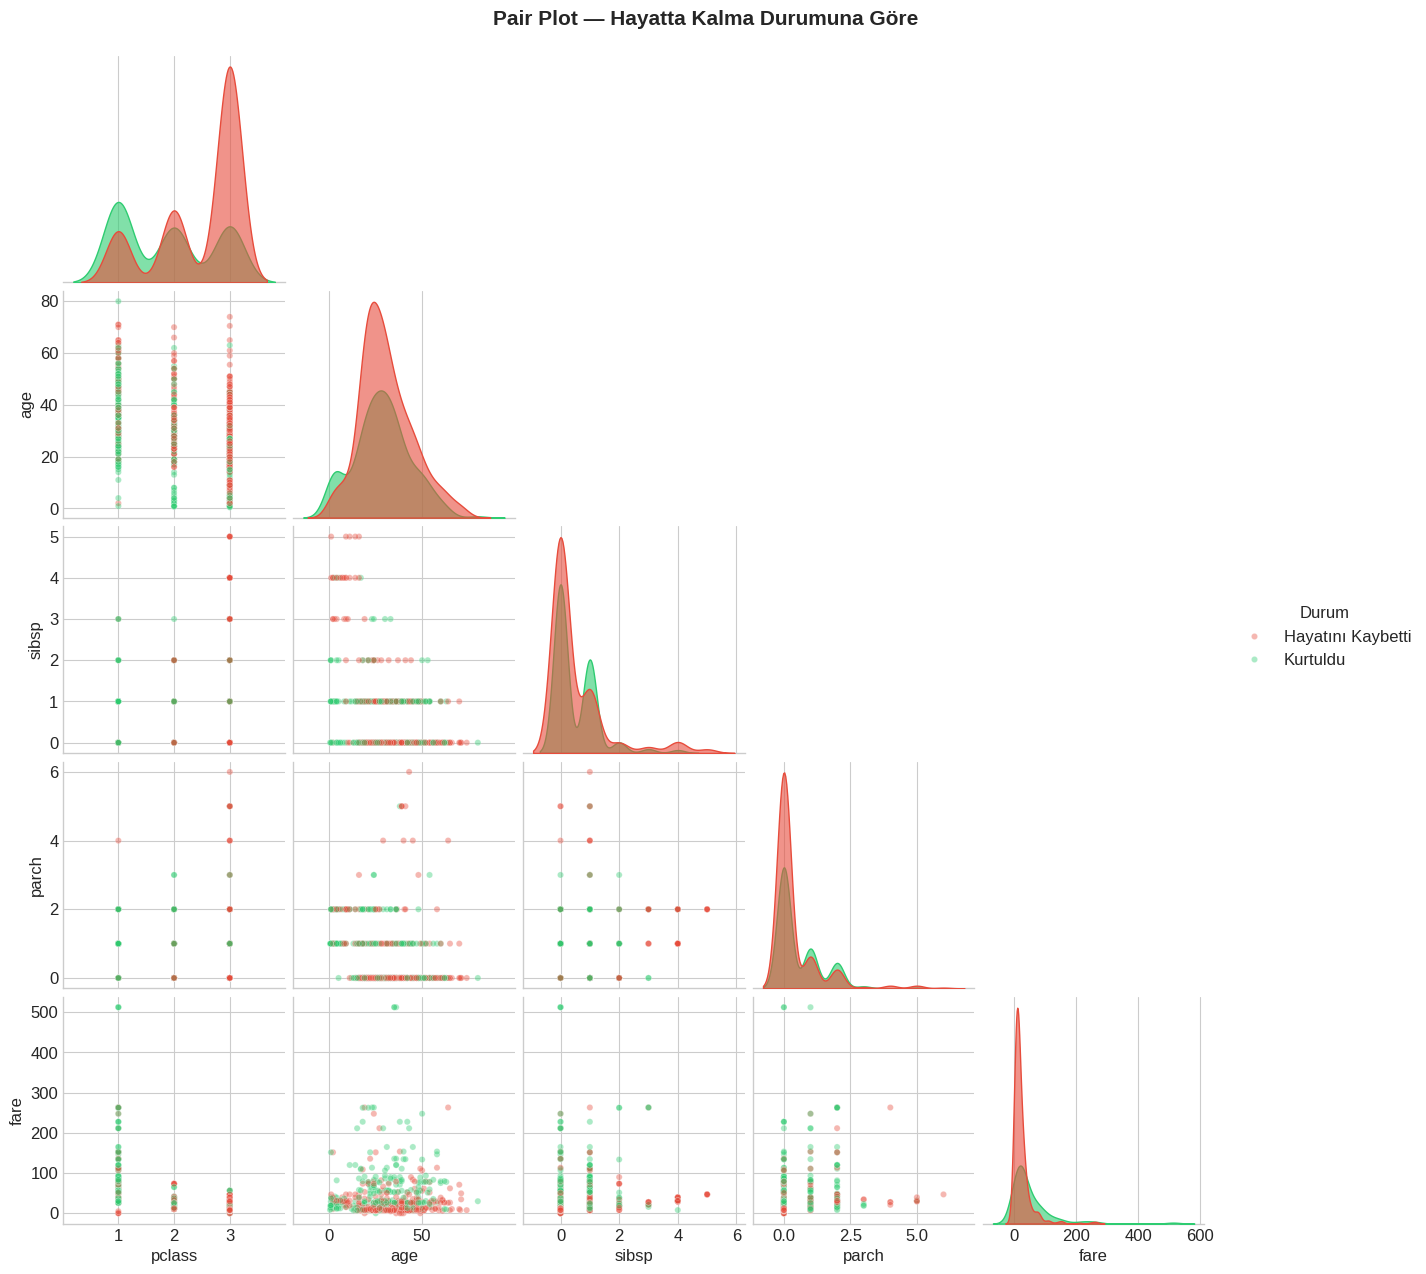

In [33]:
# ─── 8B. PAIR PLOT ──────────────────────────────────────────
# Tüm sayısal değişken çiftlerini tek seferde görselleştirir
# Köşegen: KDE (her değişkenin kendi dağılımı)
# Diğerleri: Scatter plot (her ikili ilişki)

# Sayısal sütunları al — 'survived' zaten sayısal olduğu için listede var
# Çift almamak için önce çıkarıyoruz
sayisal_sutunlar = df.select_dtypes(include=np.number).columns.tolist()
plot_sutunlar = [c for c in sayisal_sutunlar if c != 'survived']

# Hayatta kalma etiketini ayrı bir Series olarak oluştur
# .map() Series üzerinde çalışırken dict sorun çıkardığı için
# numpy ile direkt etiketliyoruz
survived_etiket = np.where(df['survived'] == 1, 'Kurtuldu', 'Hayatını Kaybetti')

# Temiz DataFrame oluştur
df_pairplot = df[plot_sutunlar].copy()
df_pairplot['survived_str'] = survived_etiket
df_pairplot = df_pairplot.dropna()

print(f"Pair plot için kullanılan gözlem sayısı: {len(df_pairplot)}")
print(f"Değişkenler: {plot_sutunlar}")
print(f"Sınıf dağılımı:\n{df_pairplot['survived_str'].value_counts()}")

# Pair plot çiz
g = sns.pairplot(
    df_pairplot,
    hue='survived_str',                    # Renk kodlaması: hayatta kalma
    palette={'Kurtuldu': '#2ECC71',
             'Hayatını Kaybetti': '#E74C3C'},
    diag_kind='kde',                        # Köşegen: KDE yoğunluk grafiği
    plot_kws={'alpha': 0.4, 's': 20},       # Nokta saydamlığı ve boyutu
    diag_kws={'alpha': 0.6},
    corner=True                             # Sadece alt üçgen — daha sade
)

g.fig.suptitle('Pair Plot — Hayatta Kalma Durumuna Göre',
               y=1.02, fontsize=15, fontweight='bold')

# Legend başlığını düzelt
g._legend.set_title('Durum')

plt.show()

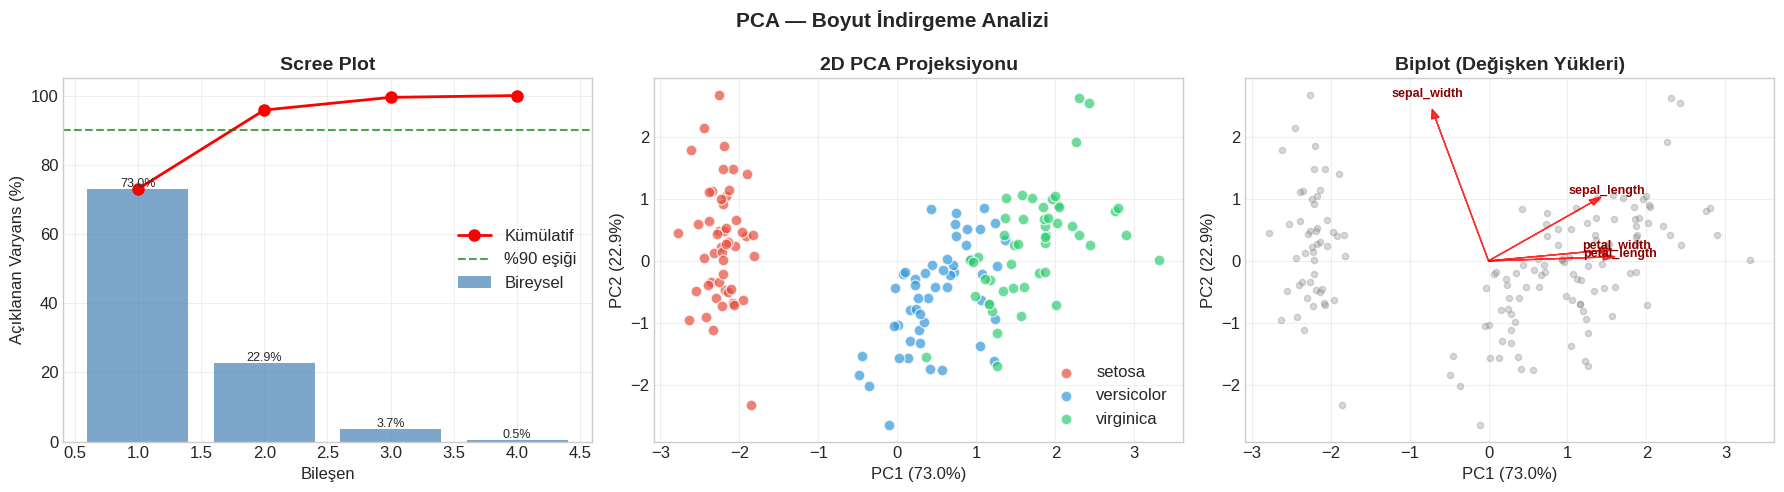


📊 PCA Özet:
  PC1:  73.0%  (Kümülatif: %73.0)
  PC2:  22.9%  (Kümülatif: %95.8)
  PC3:   3.7%  (Kümülatif: %99.5)
  PC4:   0.5%  (Kümülatif: %100.0)


In [34]:
# ─── 8C. PCA ANALİZİ ────────────────────────────────────────
# Principal Component Analysis — Boyut İndirgeme
# Iris veri seti 4 sayısal özelliğe sahip — PCA ile 2D'ye indirgiyoruz

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris_sayisal = iris.select_dtypes(include=np.number)
iris_etiket  = iris['species']

# ── Adım 1: Standardizasyon (PCA için zorunlu!)
# StandardScaler → ortalaması 0, std sapması 1 olan veri
scaler     = StandardScaler()
iris_scaled = scaler.fit_transform(iris_sayisal)

# ── Adım 2: PCA uygula (tüm bileşenler)
pca_tum = PCA()
pca_tum.fit(iris_scaled)

# Açıklanan varyans grafiği
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('PCA — Boyut İndirgeme Analizi', fontsize=15, fontweight='bold')

# 1. Açıklanan Varyans (Scree Plot)
explained = pca_tum.explained_variance_ratio_ * 100
kumulatif  = np.cumsum(explained)

x_pos = np.arange(1, len(explained)+1)
axes[0].bar(x_pos, explained, alpha=0.7, color='steelblue', label='Bireysel')
axes[0].plot(x_pos, kumulatif, 'ro-', linewidth=2, markersize=8, label='Kümülatif')
axes[0].axhline(90, color='green', ls='--', alpha=0.7, label='%90 eşiği')
axes[0].set_xlabel('Bileşen')
axes[0].set_ylabel('Açıklanan Varyans (%)')
axes[0].set_title('Scree Plot')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for i, (bireysel, kum) in enumerate(zip(explained, kumulatif)):
    axes[0].text(i+1, bireysel+0.5, f'{bireysel:.1f}%', ha='center', fontsize=9)

# ── Adım 3: 2D PCA
pca2d = PCA(n_components=2)
iris_pca2d = pca2d.fit_transform(iris_scaled)

renkler = {'setosa': '#E74C3C', 'versicolor': '#3498DB', 'virginica': '#2ECC71'}

# 2. 2D PCA scatter
for tur in iris_etiket.unique():
    maske = iris_etiket == tur
    axes[1].scatter(iris_pca2d[maske, 0], iris_pca2d[maske, 1],
                    label=tur, color=renkler[tur], alpha=0.7, s=60, edgecolors='white')
axes[1].set_xlabel(f'PC1 ({explained[0]:.1f}%)')
axes[1].set_ylabel(f'PC2 ({explained[1]:.1f}%)')
axes[1].set_title('2D PCA Projeksiyonu')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. PCA Biplot — orijinal değişkenlerin PC uzayındaki yönü
axes[2].scatter(iris_pca2d[:, 0], iris_pca2d[:, 1], alpha=0.3, c='gray', s=20)
loading_matrix = pca2d.components_.T  # Her değişken için yük vektörü
scale = 2.5
for i, (load, isim) in enumerate(zip(loading_matrix, iris_sayisal.columns)):
    axes[2].arrow(0, 0, load[0]*scale, load[1]*scale,
                  head_width=0.1, color='red', alpha=0.8)
    axes[2].text(load[0]*scale*1.15, load[1]*scale*1.15, isim,
                 ha='center', fontsize=9, color='darkred', fontweight='bold')
axes[2].set_xlabel(f'PC1 ({explained[0]:.1f}%)')
axes[2].set_ylabel(f'PC2 ({explained[1]:.1f}%)')
axes[2].set_title('Biplot (Değişken Yükleri)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 PCA Özet:")
for i, (b, k) in enumerate(zip(explained, kumulatif)):
    print(f"  PC{i+1}: {b:5.1f}%  (Kümülatif: %{k:.1f})")

In [35]:
# ─── 8D. İNTERAKTİF PARALLEL COORDINATES ───────────────────
# Çok değişkenli örüntüleri keşfetmek için güçlü bir araç
# Her çizgi bir gözlemi, her dikey eksen bir değişkeni temsil eder

df_parallel = iris.copy()
df_parallel['species_code'] = LabelEncoder().fit_transform(df_parallel['species'])

fig = px.parallel_coordinates(
    df_parallel,
    dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    color='species_code',
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Iris — Parallel Coordinates Plot',
    labels={
        'sepal_length': 'Sepal Uzunluk',
        'sepal_width' : 'Sepal Genişlik',
        'petal_length': 'Petal Uzunluk',
        'petal_width' : 'Petal Genişlik',
        'species_code': 'Tür'
    }
)
fig.update_layout(height=500, coloraxis_colorbar=dict(
    tickvals=[0, 1, 2], ticktext=['setosa', 'versicolor', 'virginica']
))
fig.show()

print("💡 Parallel Coordinates Kullanımı:")
print("   Her eksenin aralığını sürükleyerek filtreleme yapabilirsiniz!")

💡 Parallel Coordinates Kullanımı:
   Her eksenin aralığını sürükleyerek filtreleme yapabilirsiniz!


## 9. Aykırı Değer (Outlier) Analizi <a id="9"></a>

**Aykırı değer**: Veri setinin geri kalanından belirgin biçimde sapan gözlemler.

### ⚠️ Aykırı Değer Türleri

| Tür | Açıklama | Örnek |
|---|---|---|
| **Nokta (Point)** | Tek bir gözlem anormal | 150 yaşında hasta |
| **Bağlamsal (Contextual)** | Bağlama göre anormal | Yaz ayında -10°C |
| **Kolektif (Collective)** | Birlikte anormal alt küme | Sahte işlem kümesi |

---

### 🔧 Tespit Yöntemleri

| Yöntem | Formül | Ne Zaman? |
|---|---|---|
| **Z-Score** | \|x - μ\| / σ > 3 | Normal dağılım varsayımı |
| **IQR** | x < Q1-1.5×IQR veya x > Q3+1.5×IQR | Dağılımdan bağımsız |
| **Modified Z-Score** | \|0.6745(x - Medyan)\| / MAD > 3.5 | Aykırıya dayanıklı |
| **Isolation Forest** | Makine öğrenmesi tabanlı | Çok boyutlu |

---

### 🎯 Ne Yapmalı?

1. **Gerçek hata mı?** → Sil veya düzelt
2. **Önemli bilgi mi?** → Koru (dolandırıcılık tespiti)
3. **Modele zarar mı?** → Dönüştür (log, sqrt, winsorize)


  fare — Aykiri Deger Analizi
  Yontem                        Aykiri       Oran
  -----------------------------------------------
  IQR                              116  %  13.02
  Z-Score (>3)                      20  %   2.24
  Mod. Z-Score (>3.5)              160  %  17.96

  IQR Sinirlar : [-26.72, 65.63]
  IQR Aykirilar: [np.float64(66.6), np.float64(66.6), np.float64(69.3), np.float64(69.3), np.float64(69.55)] ...


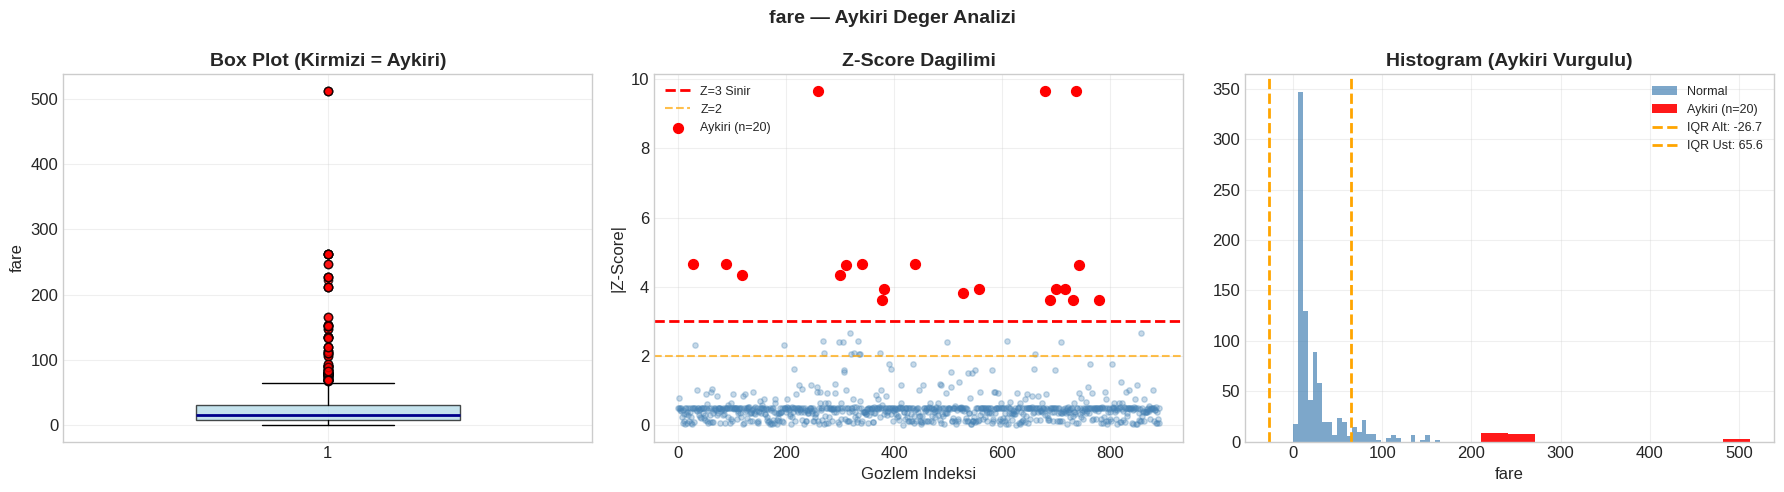


  age — Aykiri Deger Analizi
  Yontem                        Aykiri       Oran
  -----------------------------------------------
  IQR                               11  %   1.54
  Z-Score (>3)                       2  %   0.28
  Mod. Z-Score (>3.5)                1  %   0.14

  IQR Sinirlar : [-6.69, 64.81]
  IQR Aykirilar: [np.float64(65.0), np.float64(65.0), np.float64(65.0), np.float64(66.0), np.float64(70.0)] ...


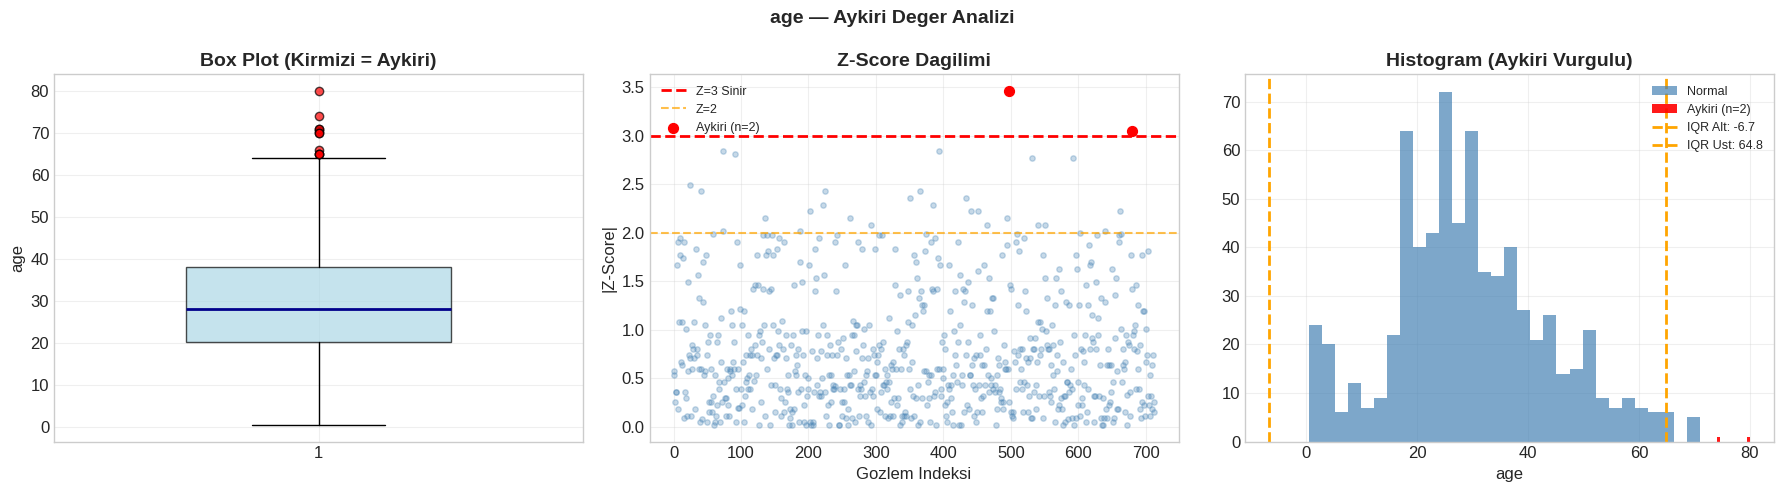

In [37]:
# ═══════════════════════════════════════════════════
# BÖLÜM 9: AYKIRI DEĞER ANALİZİ
# ═══════════════════════════════════════════════════

def aykiri_deger_analizi(df, sutun):
    """
    Üç farklı yöntemle aykırı değerleri tespit eder ve görselleştirir.
    Yöntemler: IQR, Z-Score, Modified Z-Score
    """
    veri = df[sutun].dropna()

    # ── Yöntem 1: IQR ────────────────────────────
    q1, q3 = veri.quantile(0.25), veri.quantile(0.75)
    iqr     = q3 - q1
    alt_iqr = q1 - 1.5 * iqr
    ust_iqr = q3 + 1.5 * iqr
    aykiri_iqr = veri[(veri < alt_iqr) | (veri > ust_iqr)]

    # ── Yöntem 2: Z-Score ────────────────────────
    z_skorlar = np.abs((veri - veri.mean()) / veri.std())
    aykiri_z  = veri[z_skorlar > 3]

    # ── Yöntem 3: Modified Z-Score ───────────────
    medyan = veri.median()
    mad    = np.median(np.abs(veri - medyan))
    mod_z  = 0.6745 * np.abs(veri - medyan) / (mad + 1e-10)
    aykiri_mz = veri[mod_z > 3.5]

    # ── Özet tablosu ─────────────────────────────
    print(f"\n{'='*55}")
    print(f"  {sutun} — Aykiri Deger Analizi")
    print(f"{'='*55}")
    print(f"  {'Yontem':<25} {'Aykiri':>10} {'Oran':>10}")
    print(f"  {'-'*47}")
    for adi, ayk in [("IQR", aykiri_iqr),
                     ("Z-Score (>3)", aykiri_z),
                     ("Mod. Z-Score (>3.5)", aykiri_mz)]:
        print(f"  {adi:<25} {len(ayk):>10}  %{len(ayk)/len(veri)*100:>7.2f}")

    print(f"\n  IQR Sinirlar : [{alt_iqr:.2f}, {ust_iqr:.2f}]")
    if len(aykiri_iqr) > 0:
        goster = sorted(aykiri_iqr.values)[:5]
        print(f"  IQR Aykirilar: {goster} {'...' if len(aykiri_iqr) > 5 else ''}")

    # ── Görselleştirme ───────────────────────────
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{sutun} — Aykiri Deger Analizi', fontsize=14, fontweight='bold')

    # 1. Box Plot
    bp = axes[0].boxplot(
        veri,
        patch_artist=True,
        widths=0.5,
        boxprops=dict(facecolor='lightblue', alpha=0.7),
        flierprops=dict(marker='o', color='red', markerfacecolor='red',
                        markersize=6, alpha=0.7),
        medianprops=dict(color='darkblue', linewidth=2)
    )
    axes[0].set_title('Box Plot (Kirmizi = Aykiri)')
    axes[0].set_ylabel(sutun)
    axes[0].grid(True, alpha=0.3)

    # 2. Z-Score dağılımı
    axes[1].scatter(range(len(veri)), z_skorlar, alpha=0.3, color='steelblue', s=15)
    axes[1].axhline(3, color='red',    ls='--', lw=2,   label='Z=3 Sinir')
    axes[1].axhline(2, color='orange', ls='--', lw=1.5, label='Z=2', alpha=0.7)
    aykiri_idx = np.where(z_skorlar > 3)[0]
    if len(aykiri_idx) > 0:
        axes[1].scatter(aykiri_idx, z_skorlar.iloc[aykiri_idx],
                        color='red', s=50, zorder=5,
                        label=f'Aykiri (n={len(aykiri_idx)})')
    axes[1].set_title('Z-Score Dagilimi')
    axes[1].set_xlabel('Gozlem Indeksi')
    axes[1].set_ylabel('|Z-Score|')
    axes[1].legend(fontsize=9)
    axes[1].grid(True, alpha=0.3)

    # 3. Histogram — aykırıları renklendir
    axes[2].hist(veri[z_skorlar <= 3], bins=30,
                 color='steelblue', alpha=0.7, label='Normal')
    if len(aykiri_z) > 0:
        axes[2].hist(aykiri_z, bins=10,
                     color='red', alpha=0.9, label=f'Aykiri (n={len(aykiri_z)})')
    axes[2].axvline(alt_iqr, color='orange', ls='--', lw=2,
                    label=f'IQR Alt: {alt_iqr:.1f}')
    axes[2].axvline(ust_iqr, color='orange', ls='--', lw=2,
                    label=f'IQR Ust: {ust_iqr:.1f}')
    axes[2].set_title('Histogram (Aykiri Vurgulu)')
    axes[2].set_xlabel(sutun)
    axes[2].legend(fontsize=9)
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return aykiri_iqr


# Ücret ve yaş değişkenleri için analiz
if 'fare' in df.columns:
    aykiri_fare = aykiri_deger_analizi(df, 'fare')

if 'age' in df.columns:
    aykiri_age = aykiri_deger_analizi(df, 'age')

🔧 Aykırı Değer İşleme Stratejileri Karşılaştırması


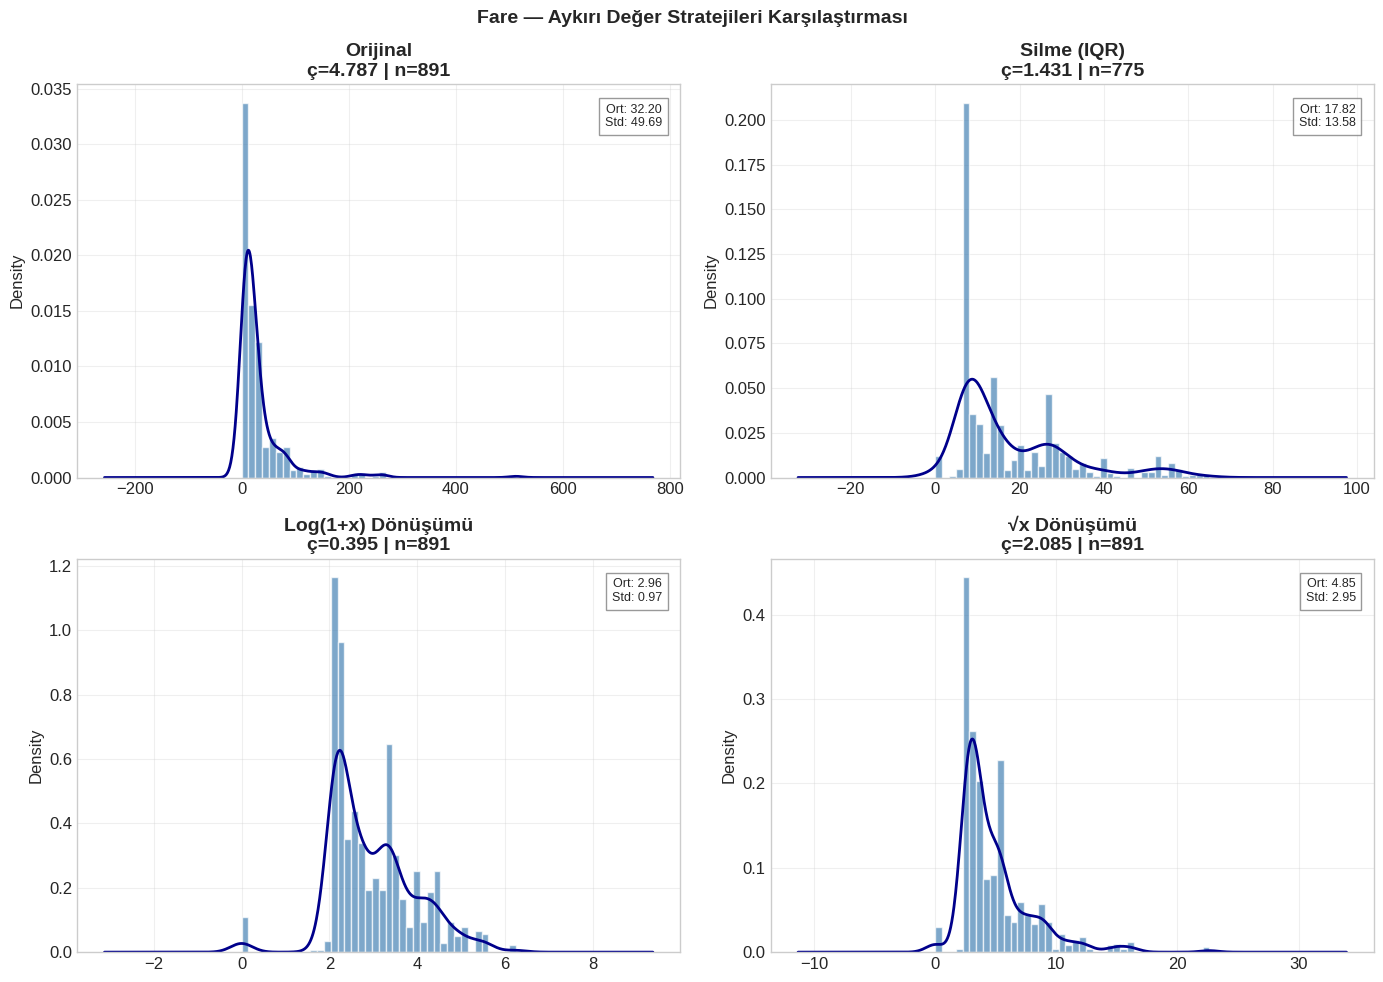


📊 Strateji Karşılaştırması:
  Orijinal       : n= 891  Ort=32.20  Std=49.69  Çarpıklık=4.787
  Silme          : n= 775  Ort=17.82  Std=13.58  Çarpıklık=1.431
  Log(1+x)       : n= 891  Ort=2.96  Std=0.97  Çarpıklık=0.395
  Sqrt           : n= 891  Ort=4.85  Std=2.95  Çarpıklık=2.085


In [38]:
# ── Aykırı Değer İşleme Stratejileri ───────────────────────

print("🔧 Aykırı Değer İşleme Stratejileri Karşılaştırması")
print("=" * 60)

if 'fare' in df.columns:
    fare_temiz = df['fare'].dropna()

    q1, q3 = fare_temiz.quantile(0.25), fare_temiz.quantile(0.75)
    iqr     = q3 - q1

    # Strateji 1: Silme (trimming)
    alt_sinir = q1 - 1.5 * iqr
    ust_sinir = q3 + 1.5 * iqr
    silme = fare_temiz[(fare_temiz >= alt_sinir) & (fare_temiz <= ust_sinir)]

    # Strateji 2: Winsorizing (kırpma) — aykırıları sınır değeriyle değiştir
    winsorized = fare_temiz.copy()
    winsorized = winsorized.clip(lower=alt_sinir, upper=ust_sinir)

    # Strateji 3: Log dönüşümü — çarpık dağılımı normalleştirir
    log_transform = np.log1p(fare_temiz)   # log(1+x): sıfır değerler için güvenli

    # Strateji 4: Sqrt dönüşümü
    sqrt_transform = np.sqrt(fare_temiz)

    # Görselleştirme: Orijinal vs Dönüştürülmüş
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Fare — Aykırı Değer Stratejileri Karşılaştırması', fontsize=14, fontweight='bold')

    for ax, veri, baslik in zip(axes.flat,
        [fare_temiz, silme, log_transform, sqrt_transform],
        ['Orijinal', 'Silme (IQR)', 'Log(1+x) Dönüşümü', '√x Dönüşümü']):

        ax.hist(veri, bins=40, alpha=0.7, color='steelblue', edgecolor='white', density=True)
        veri.plot.kde(ax=ax, color='darkblue', linewidth=2)

        ax.set_title(f'{baslik}\nç={veri.skew():.3f} | n={len(veri)}')
        ax.grid(True, alpha=0.3)

        stats_text = f'Ort: {veri.mean():.2f}\nStd: {veri.std():.2f}'
        ax.text(0.97, 0.95, stats_text, transform=ax.transAxes,
                ha='right', va='top', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

    plt.tight_layout()
    plt.show()

    print("\n📊 Strateji Karşılaştırması:")
    for strateji, veri in [("Orijinal", fare_temiz), ("Silme", silme),
                             ("Log(1+x)", log_transform), ("Sqrt", sqrt_transform)]:
        print(f"  {strateji:15s}: n={len(veri):4d}  Ort={veri.mean():.2f}  "
              f"Std={veri.std():.2f}  Çarpıklık={veri.skew():.3f}")

## 10. İleri Görselleştirme Teknikleri <a id="10"></a>

Modern EDA'da **interaktif ve çok boyutlu görselleştirmeler** büyük önem taşır.  
Bu bölümde Plotly ile güçlü, paylaşılabilir görselleştirmeler yapıyoruz.

### 🎨 Kütüphane Seçim Rehberi

| Kütüphane | Güçlü Yönleri | Kullanım |
|---|---|---|
| **Matplotlib** | Tam kontrol, yayın kalitesi | Paper/rapor figürleri |
| **Seaborn** | İstatistiksel grafikler, estetik | Hızlı istatistiksel analiz |
| **Plotly** | İnteraktif, web uyumlu | Dashboard, sunum |
| **Missingno** | Eksik veri özel | Eksik analiz |

In [39]:
# ═══════════════════════════════════════════════════
# BÖLÜM 10: İLERİ GÖRSELLEŞTİRME TEKNİKLERİ
# ═══════════════════════════════════════════════════

# ─── 10A. PLOTLy İNTERAKTİF SUNBURST ────────────────────
# Sunburst: Hiyerarşik kategorik ilişkileri gösterir

if all(c in df.columns for c in ['pclass', 'sex', 'survived']):
    df_sun = df.dropna(subset=['pclass', 'sex', 'survived']).copy()
    df_sun['survived_str'] = df_sun['survived'].map({0:'Hayatını Kaybetti', 1:'Kurtuldu'})
    df_sun['pclass_str']   = df_sun['pclass'].map({1:'1.Sınıf', 2:'2.Sınıf', 3:'3.Sınıf'})

    # Grup sayılarını hesapla
    sunburst_df = df_sun.groupby(['pclass_str', 'sex', 'survived_str']).size().reset_index(name='Sayi')

    fig = px.sunburst(
        sunburst_df,
        path=['pclass_str', 'sex', 'survived_str'],
        values='Sayi',
        title='Titanic — Sınıf → Cinsiyet → Hayatta Kalma (Sunburst)',
        color='Sayi',
        color_continuous_scale='RdYlGn',
    )
    fig.update_layout(height=550)
    fig.show()
    print("💡 Grafik üzerine tıklayarak alt kümelerine inebilirsiniz!")

💡 Grafik üzerine tıklayarak alt kümelerine inebilirsiniz!


In [40]:
# ─── 10B. PLOTLY İNTERAKTİF SCATTER 3D ─────────────────────
# 3 sayısal değişkeni aynı anda görselleştirme

fig = px.scatter_3d(
    iris,
    x='sepal_length',
    y='sepal_width',
    z='petal_length',
    color='species',
    size='petal_width',
    size_max=12,
    opacity=0.8,
    title='Iris — 3D Scatter Plot (Sepal/Petal)',
    labels={
        'sepal_length': 'Sepal Uzunluk',
        'sepal_width' : 'Sepal Genişlik',
        'petal_length': 'Petal Uzunluk',
        'petal_width' : 'Petal Genişlik (boyut)',
        'species'     : 'Tür'
    },
    color_discrete_map={
        'setosa'    : '#E74C3C',
        'versicolor': '#3498DB',
        'virginica' : '#2ECC71'
    }
)
fig.update_layout(height=600)
fig.show()
print("💡 Grafiği döndürmek için sürükleyin!")

💡 Grafiği döndürmek için sürükleyin!


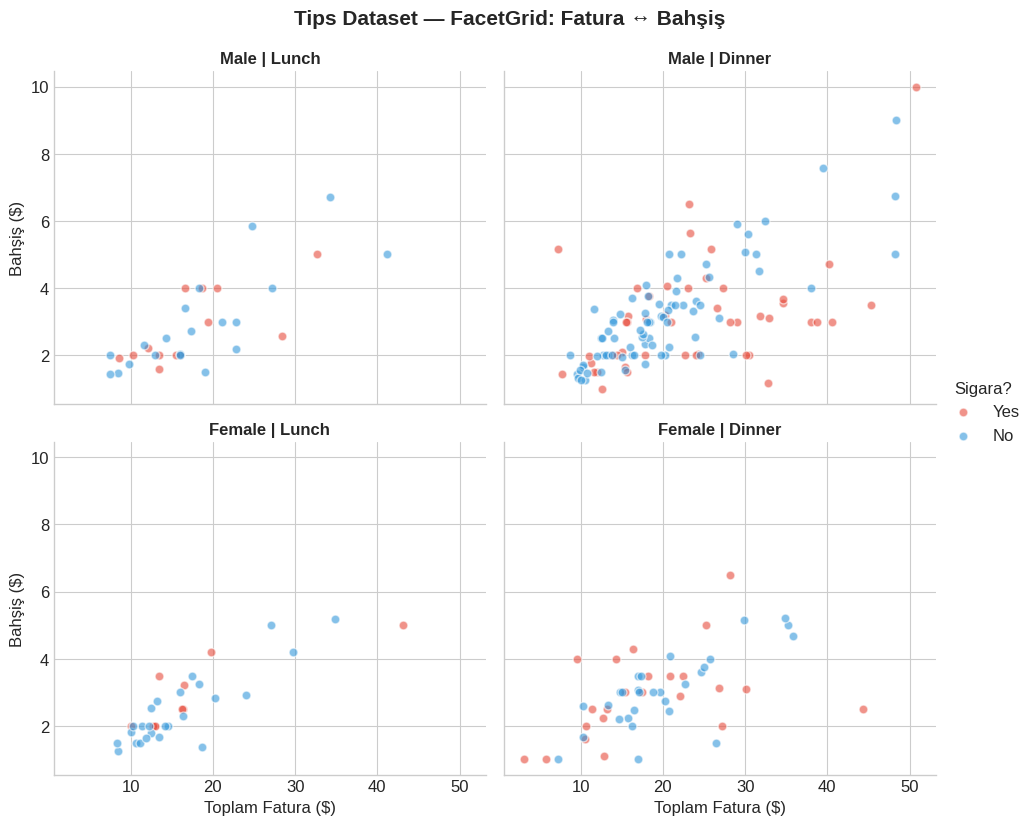


💡 FacetGrid Gözlemleri:
   Her alt grafik belirli bir Zaman × Cinsiyet kombinasyonunu gösterir
   Kırmızı: Sigara içen, Mavi: İçmeyen


In [41]:
# ─── 10C. GELİŞMİŞ SEABORN: FACETGRİD ──────────────────────
# FacetGrid: Koşullu dağılımları farklı alt grafiklerde gösterir
# "Hangi gün, öğle mi akşam mı daha fazla bahşiş?" gibi sorulara cevap

g = sns.FacetGrid(
    tips,
    col='time',    # Sütun boyutu: Öğle/Akşam
    row='sex',     # Satır boyutu: Cinsiyet
    hue='smoker',  # Renk: Sigara içiyor mu?
    height=4,
    aspect=1.2,
    palette=['#E74C3C', '#3498DB']
)
g.map(plt.scatter, 'total_bill', 'tip', alpha=0.6, s=40, edgecolors='white')
g.add_legend(title='Sigara?')
g.set_axis_labels('Toplam Fatura ($)', 'Bahşiş ($)')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.fig.suptitle('Tips Dataset — FacetGrid: Fatura ↔ Bahşiş',
               y=1.03, fontsize=15, fontweight='bold')
plt.show()

print("\n💡 FacetGrid Gözlemleri:")
print("   Her alt grafik belirli bir Zaman × Cinsiyet kombinasyonunu gösterir")
print("   Kırmızı: Sigara içen, Mavi: İçmeyen")

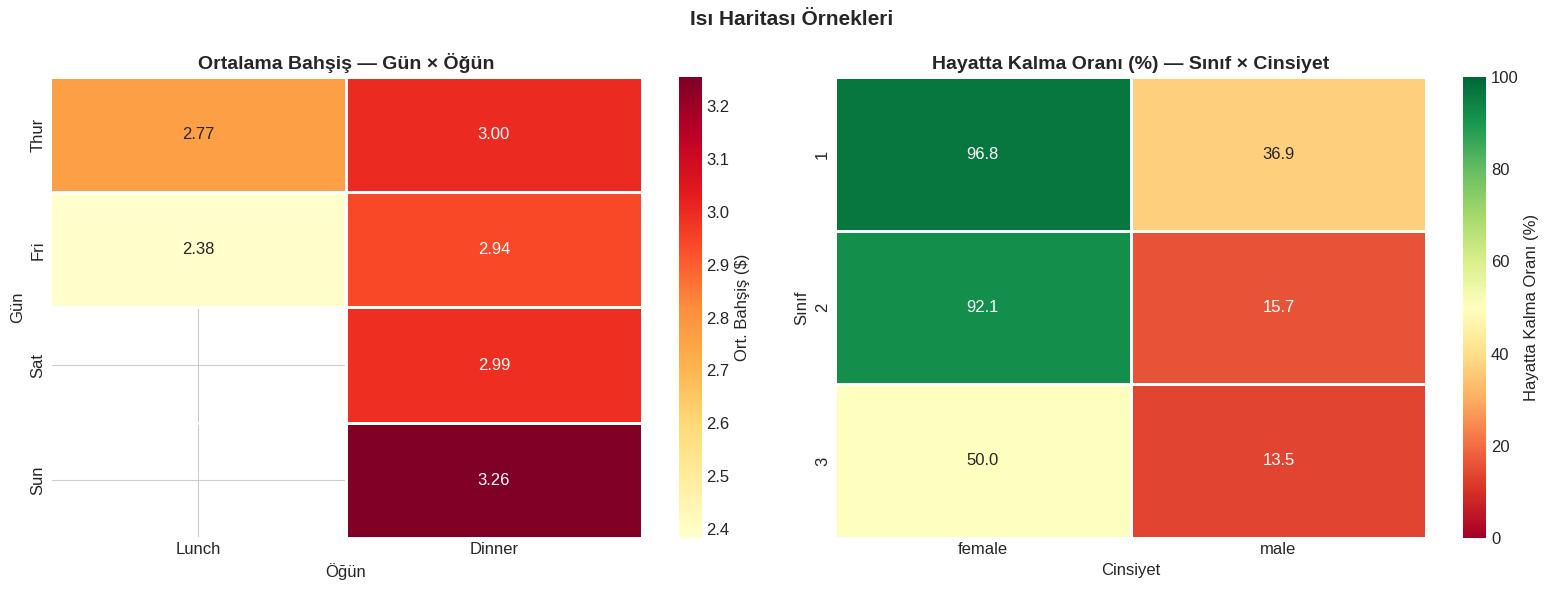

In [42]:
# ─── 10D. HEATMAPs VE ANNOTATİON ────────────────────────────

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Isı Haritası Örnekleri', fontsize=15, fontweight='bold')

# 1. Pivot tablo heatmap — ortalama bahşiş (gün × öğün)
pivot = tips.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[0], cbar_kws={'label': 'Ort. Bahşiş ($)'},
            linewidths=1, linecolor='white')
axes[0].set_title('Ortalama Bahşiş — Gün × Öğün')
axes[0].set_xlabel('Öğün')
axes[0].set_ylabel('Gün')

# 2. Hayatta kalma oranı — Sınıf × Cinsiyet
if all(c in df.columns for c in ['pclass', 'sex', 'survived']):
    kac_pivot = df.pivot_table(values='survived', index='pclass',
                                columns='sex', aggfunc='mean').mul(100).round(1)
    sns.heatmap(kac_pivot, annot=True, fmt='.1f', cmap='RdYlGn',
                ax=axes[1], cbar_kws={'label': 'Hayatta Kalma Oranı (%)'},
                linewidths=1, linecolor='white',
                vmin=0, vmax=100)
    axes[1].set_title('Hayatta Kalma Oranı (%) — Sınıf × Cinsiyet')
    axes[1].set_xlabel('Cinsiyet')
    axes[1].set_ylabel('Sınıf')

plt.tight_layout()
plt.show()

In [44]:
# ─── 10E. PLOTLY EXPRESS ANIMASYON ─────────────────────────
# California Housing: Konum bazlı ev fiyatları görselleştirme

# Veri hazırlama: Büyük veri setinden örnek al
housing_sample = housing.sample(2000, random_state=42)

fig = px.scatter(
    housing_sample,
    x='Longitude',
    y='Latitude',
    color='MedHouseVal',         # Ev değeri renk kodlaması
    size='Population',           # Nüfus = nokta boyutu
    size_max=15,
    opacity=0.6,
    color_continuous_scale='Viridis',
    title='California Housing — Coğrafi Dağılım (2000 örnek)',
    labels={
        'Longitude'   : 'Boylam',
        'Latitude'    : 'Enlem',
        'MedHouseVal' : 'Medyan Ev Değeri ($100K)',
        'Population'  : 'Nüfus'
    },
    hover_data={
        'MedInc'     : ':.2f',
        'HouseAge'   : True,
        'AveRooms'   : ':.1f',
    }
)
fig.update_layout(height=600)
fig.show()

print("💡 Üzerine gelerek detay bilgileri görebilirsiniz!")
print("   Sarı noktalar = Yüksek değerli bölgeler (LA, SF sahil şeridi)")

💡 Üzerine gelerek detay bilgileri görebilirsiniz!
   Sarı noktalar = Yüksek değerli bölgeler (LA, SF sahil şeridi)


## 11. İstatistiksel Testler <a id="11"></a>

EDA'nın son adımlarından biri görsel bulgularımızı **istatistiksel olarak doğrulamaktır**.

### 📖 Test Seçim Rehberi

```
Soru: "İki grup ortalaması arasında fark var mı?"
      ↓
  Parametrik mı?
  (Normal dağılım + Homojen varyans)
      ├── Evet → t-test (2 grup) / ANOVA (3+ grup)
      └── Hayır → Mann-Whitney U (2) / Kruskal-Wallis (3+)

Soru: "İki kategorik değişken bağımsız mı?"
      ↓
  Ki-kare testi (χ²)

Soru: "Dağılım normal mi?"
      ↓
  Shapiro-Wilk (n<2000) / D'Agostino-Pearson
```

### 📌 Temel Kavramlar

| Kavram | Açıklama |
|---|---|
| **H₀ (Null Hipotez)** | Varsayılan durum (fark yoktur) |
| **H₁ (Alternatif)** | Test ettiğimiz durum (fark vardır) |
| **p-değeri** | H₀ doğruyken bu kadar uç sonuç görme olasılığı |
| **α (Anlam Düzeyi)** | Genellikle 0.05 — H₀ reddetme eşiği |
| **Etki Büyüklüğü** | İstatistiksel anlamlılıktan bağımsız pratik önem |

In [45]:
# ═══════════════════════════════════════════════════
# BÖLÜM 11: İSTATİSTİKSEL TESTLER
# ═══════════════════════════════════════════════════

# ─── 11A. NORMALLİK TESTLERİ ────────────────────────────

def normallik_testleri(df, sutunlar):
    """
    Birden fazla yöntemle normallik testi yapar.
    Shapiro-Wilk (küçük n), D'Agostino (büyük n), Kolmogorov-Smirnov
    """
    print(f"{'Değişken':15s} {'Shapiro p':12s} {'D\'Agostino p':15s} {'KS p':12s} {'Sonuç':20s}")
    print("─" * 78)

    sonuclar = []
    for sutun in sutunlar:
        veri = df[sutun].dropna()

        # Test 1: Shapiro-Wilk (n ≤ 5000 için iyi)
        if len(veri) <= 5000:
            orneklem = veri.sample(min(len(veri), 100), random_state=42) # max 100 örnek
            _, p_sw = shapiro(orneklem)
        else:
            p_sw = np.nan

        # Test 2: D'Agostino-Pearson (büyük n için daha güvenilir)
        try:
            _, p_da = normaltest(veri)
        except:
            p_da = np.nan

        # Test 3: Kolmogorov-Smirnov (teorik normal dağılıma karşı)
        standart_veri = (veri - veri.mean()) / veri.std()
        _, p_ks = stats.kstest(standart_veri, 'norm')

        # Sonuç: En az 2 test normal diyorsa normal kabul et
        p_degerler = [p for p in [p_sw, p_da, p_ks] if not np.isnan(p)]
        normal_sayisi = sum(p > 0.05 for p in p_degerler)

        sonuc = "✅ Normal" if normal_sayisi >= 2 else "❌ Normal Değil"

        print(f"{sutun:15s} "
              f"{p_sw:12.4f} " if not np.isnan(p_sw) else f"{'N/A':12s} ",
              end="")
        print(f"{p_da:15.4f} " if not np.isnan(p_da) else f"{'N/A':15s} ", end="")
        print(f"{p_ks:12.4f} {sonuc}")

        sonuclar.append({'Değişken': sutun, 'Shapiro_p': p_sw,
                          'DAgostino_p': p_da, 'KS_p': p_ks, 'Sonuç': sonuc})

    return pd.DataFrame(sonuclar)

sayisal_sutunlar = df.select_dtypes(include=np.number).columns.tolist()
print("🧪 Normallik Test Sonuçları (H₀: Normal dağılım)\n")
normallik_df = normallik_testleri(df, sayisal_sutunlar)
print("\np < 0.05 → H₀ RED → Normal değil | p ≥ 0.05 → H₀ KABUL → Normal")

🧪 Normallik Test Sonuçları (H₀: Normal dağılım)

Değişken        Shapiro p    D'Agostino p    KS p         Sonuç               
──────────────────────────────────────────────────────────────────────────────
survived              0.0000          0.0000       0.0000 ❌ Normal Değil
pclass                0.0000          0.0000       0.0000 ❌ Normal Değil
age                   0.0515          0.0001       0.0050 ❌ Normal Değil
sibsp                 0.0000          0.0000       0.0000 ❌ Normal Değil
parch                 0.0000          0.0000       0.0000 ❌ Normal Değil
fare                  0.0000          0.0000       0.0000 ❌ Normal Değil

p < 0.05 → H₀ RED → Normal değil | p ≥ 0.05 → H₀ KABUL → Normal


In [46]:
# ─── 11B. GRUP KARŞILAŞTIRMA TESTLERİ ────────────────────

print("\n🧪 Grup Karşılaştırma Testleri")
print("=" * 60)

if all(c in df.columns for c in ['age', 'sex', 'fare', 'survived']):

    # TEST 1: Erkekler ve kadınlar için ücret farkı var mı?
    print("\n📌 Test 1: Erkek vs Kadın — Bilet Ücreti Farkı")
    erkek_ucret = df[df['sex']=='male']['fare'].dropna()
    kadin_ucret = df[df['sex']=='female']['fare'].dropna()

    # Normallik kontrolü (Shapiro - küçük örneklem için)
    _, p_norm_e = shapiro(erkek_ucret.sample(min(50, len(erkek_ucret)), random_state=42))
    _, p_norm_k = shapiro(kadin_ucret.sample(min(50, len(kadin_ucret)), random_state=42))
    print(f"  Normallik: Erkek p={p_norm_e:.4f}, Kadın p={p_norm_k:.4f}")

    if p_norm_e > 0.05 and p_norm_k > 0.05:
        # Normal dağılım → t-test
        stat, p = ttest_ind(erkek_ucret, kadin_ucret)
        test_adi = "t-testi"
    else:
        # Normal değil → Mann-Whitney U
        stat, p = mannwhitneyu(erkek_ucret, kadin_ucret)
        test_adi = "Mann-Whitney U"

    # Cohen's d (etki büyüklüğü)
    pooled_std = np.sqrt((erkek_ucret.std()**2 + kadin_ucret.std()**2) / 2)
    cohens_d   = abs(erkek_ucret.mean() - kadin_ucret.mean()) / pooled_std

    print(f"  {test_adi}: stat={stat:.4f}, p={p:.4f}")
    print(f"  {'✅ Anlamlı fark VAR' if p<0.05 else '❌ Anlamlı fark YOK'} (α=0.05)")
    print(f"  Cohen's d = {cohens_d:.3f} — {'Büyük' if cohens_d>0.8 else 'Orta' if cohens_d>0.5 else 'Küçük'} etki")
    print(f"  Erkek Ort: {erkek_ucret.mean():.2f} | Kadın Ort: {kadin_ucret.mean():.2f}")

    # TEST 2: Hayatta kalan vs kalmayan — yaş farkı
    print("\n📌 Test 2: Kurtuldu vs Hayatını Kaybetti — Yaş Farkı")
    yasadi = df[df['survived']==1]['age'].dropna()
    olmedi = df[df['survived']==0]['age'].dropna()

    _, p_norm_y = shapiro(yasadi.sample(min(50, len(yasadi)), random_state=42))
    _, p_norm_o = shapiro(olmedi.sample(min(50, len(olmedi)), random_state=42))

    if p_norm_y > 0.05 and p_norm_o > 0.05:
        stat2, p2 = ttest_ind(yasadi, olmedi)
        test2 = "t-testi"
    else:
        stat2, p2 = mannwhitneyu(yasadi, olmedi)
        test2 = "Mann-Whitney U"

    print(f"  {test2}: stat={stat2:.4f}, p={p2:.4f}")
    print(f"  {'✅ Anlamlı fark VAR' if p2<0.05 else '❌ Anlamlı fark YOK'} (α=0.05)")
    print(f"  Kurtuldular Ort Yaş: {yasadi.mean():.2f} | Hayatını Kaybedenler: {olmedi.mean():.2f}")

    # TEST 3: Sınıf bazında ücret farklı mı? (3 grup → ANOVA/Kruskal-Wallis)
    print("\n📌 Test 3: Sınıf (1/2/3) — Bilet Ücreti (One-way ANOVA / Kruskal-Wallis)")
    gruplar_ucret = [df[df['pclass']==k]['fare'].dropna() for k in [1, 2, 3]]

    # Tüm gruplar normal mi?
    hepsi_normal = all(
        shapiro(g.sample(min(50,len(g)), random_state=42))[1] > 0.05
        for g in gruplar_ucret if len(g) > 8
    )

    if hepsi_normal:
        f_stat, p3 = f_oneway(*gruplar_ucret)
        print(f"  One-way ANOVA: F={f_stat:.4f}, p={p3:.4f}")
    else:
        h_stat, p3 = kruskal(*gruplar_ucret)
        print(f"  Kruskal-Wallis H: H={h_stat:.4f}, p={p3:.4f}")

    print(f"  {'✅ Gruplar arası anlamlı fark VAR' if p3<0.05 else '❌ Anlamlı fark YOK'}")
    for k, g in zip([1,2,3], gruplar_ucret):
        print(f"  Sınıf {k}: n={len(g)}, Ort={g.mean():.2f}, Med={g.median():.2f}")


🧪 Grup Karşılaştırma Testleri

📌 Test 1: Erkek vs Kadın — Bilet Ücreti Farkı
  Normallik: Erkek p=0.0000, Kadın p=0.0000
  Mann-Whitney U: stat=62175.0000, p=0.0000
  ✅ Anlamlı fark VAR (α=0.05)
  Cohen's d = 0.371 — Küçük etki
  Erkek Ort: 25.52 | Kadın Ort: 44.48

📌 Test 2: Kurtuldu vs Hayatını Kaybetti — Yaş Farkı
  Mann-Whitney U: stat=57682.0000, p=0.1605
  ❌ Anlamlı fark YOK (α=0.05)
  Kurtuldular Ort Yaş: 28.34 | Hayatını Kaybedenler: 30.63

📌 Test 3: Sınıf (1/2/3) — Bilet Ücreti (One-way ANOVA / Kruskal-Wallis)
  Kruskal-Wallis H: H=438.0437, p=0.0000
  ✅ Gruplar arası anlamlı fark VAR
  Sınıf 1: n=216, Ort=84.15, Med=60.29
  Sınıf 2: n=184, Ort=20.66, Med=14.25
  Sınıf 3: n=491, Ort=13.68, Med=8.05


## 12. Otomatik EDA Araçları <a id="12"></a>

### 🤖 ydata-profiling (eski adı: pandas-profiling)

Tek komutla **kapsamlı EDA raporu** üretir:
- Tüm değişken istatistikleri
- Korelasyon matrisleri
- Eksik değer analizi
- Örüntü uyarıları
- HTML veya Jupyter Widget olarak kaydetme

```bash
pip install ydata-profiling
```

> ⚠️ **Not**: Büyük veri setlerinde yavaş çalışabilir.  
> `minimal=True` parametresi ile hızlı özet alabilirsiniz.

In [48]:
# ═══════════════════════════════════════════════════
# BÖLÜM 12: OTOMATİK EDA ARAÇLARI
# ═══════════════════════════════════════════════════

# ydata-profiling ile otomatik EDA raporu
# Bu araç kapsamlı bir HTML raporu üretir

try:
    from ydata_profiling import ProfileReport

    print("📊 ydata-profiling ile EDA raporu oluşturuluyor...")
    print("   (Bu işlem birkaç dakika sürebilir)\n")

    # Titanic veri seti için profil raporu
    # minimal=True → daha hızlı, temel istatistikler
    # minimal=False → tam rapor (korelasyon, örüntü analizi dahil)

    profil = ProfileReport(
        df,                            # Analiz edilecek DataFrame
        title="Titanic EDA Raporu",    # Rapor başlığı
        minimal=True,                  # Hız için minimal mod
        explorative=True               # Keşifsel mod
    )

    # Jupyter'da göster
    profil.to_widgets()

    # HTML olarak kaydet (isteğe bağlı)
    # profil.to_file("titanic_eda_raporu.html")
    # print("✅ Rapor 'titanic_eda_raporu.html' olarak kaydedildi!")

except ImportError:
    print("⚠️  ydata-profiling kurulu değil.")
    print("   Kurulum: pip install ydata-profiling")
    print("\n📌 Alternatif: Aşağıdaki hücrede manuel özet raporu çalıştırın.")
    print("\n💡 Diğer Otomatik EDA Araçları:")
    print("   • sweetviz    : pip install sweetviz")
    print("   • dtale       : pip install dtale")
    print("   • autoviz     : pip install autoviz")
    print("   • lux         : pip install lux-api")

⚠️  ydata-profiling kurulu değil.
   Kurulum: pip install ydata-profiling

📌 Alternatif: Aşağıdaki hücrede manuel özet raporu çalıştırın.

💡 Diğer Otomatik EDA Araçları:
   • sweetviz    : pip install sweetviz
   • dtale       : pip install dtale
   • autoviz     : pip install autoviz
   • lux         : pip install lux-api


In [49]:
# ── sweetviz ile alternatif otomatik EDA ────────────────────
# sweetviz: Hedef değişkene göre karşılaştırmalı rapor üretir

try:
    import sweetviz as sv

    print("📊 sweetviz raporu oluşturuluyor...")

    # İki grubu karşılaştır: Hayatta kalan vs Hayatını kaybeden
    if 'survived' in df.columns:
        df_yasadi = df[df['survived']==1]
        df_olmedi = df[df['survived']==0]

        rapor = sv.compare(
            [df_yasadi, "Kurtuldu"],
            [df_olmedi, "Hayatını Kaybetti"]
        )
        rapor.show_notebook()
    else:
        rapor = sv.analyze(df)
        rapor.show_notebook()

except ImportError:
    print("⚠️  sweetviz kurulu değil: pip install sweetviz")
    print("   Kurulumdan sonra bu hücreyi tekrar çalıştırın.")

⚠️  sweetviz kurulu değil: pip install sweetviz
   Kurulumdan sonra bu hücreyi tekrar çalıştırın.


## 13. EDA Raporu Hazırlama <a id="13"></a>

İyi bir EDA raporu şu özelliklere sahip olmalıdır:

1. **Yapısal**: Sistematik bölümler, açık başlıklar
2. **Görsel**: Her bulgu için uygun grafik
3. **İstatistiksel**: Sayısal kanıtlar
4. **Yorumsal**: Sadece rakam değil, anlam
5. **Aksiyonlu**: Sonraki adımlar için öneriler

> 💡 Bu bölümdeki `eda_raporu_olustur()` fonksiyonu herhangi bir DataFrame için çalışır.

In [50]:
# ═══════════════════════════════════════════════════
# BÖLÜM 13: EDA RAPORU HAZIRLAMA
# ═══════════════════════════════════════════════════

def eda_raporu_olustur(df, veri_seti_adi="Dataset", hedef_degisken=None):
    """
    Herhangi bir DataFrame için otomatik EDA özet raporu üretir.

    Parametreler:
        df              : pandas DataFrame
        veri_seti_adi   : Rapor başlığı
        hedef_degisken  : Tahmin edilecek değişken (opsiyonel)

    Returns:
        list: Rapor satırları
    """
    from datetime import datetime
    rapor = []

    baslik = f"# 📊 EDA RAPORU: {veri_seti_adi.upper()}"
    rapor.append(baslik)
    rapor.append(f"**Oluşturulma:** {datetime.now().strftime('%d/%m/%Y %H:%M')}")
    rapor.append(f"**Hedef Değişken:** {hedef_degisken if hedef_degisken else 'Belirtilmemiş'}")
    rapor.append("\n---\n")

    # ── 1. GENEL BAKIŞ ─────────────────────────────────
    rapor.append("## 1. 📋 GENEL BAKIŞ")
    rapor.append(f"| Özellik | Değer |")
    rapor.append("|---|---|")
    rapor.append(f"| Satır Sayısı | {df.shape[0]:,} |")
    rapor.append(f"| Sütun Sayısı | {df.shape[1]} |")
    rapor.append(f"| Toplam Hücre | {df.size:,} |")
    rapor.append(f"| Eksik Hücre | {df.isnull().sum().sum():,} (%{df.isnull().sum().sum()/df.size*100:.1f}) |")
    rapor.append(f"| Tekrarlı Satır | {df.duplicated().sum():,} |")
    rapor.append(f"| Bellek Kullanımı | {df.memory_usage(deep=True).sum()/1024:.1f} KB |")

    # Veri tipleri
    sayisal_k = df.select_dtypes(include=np.number).columns.tolist()
    kategorik_k = df.select_dtypes(include=['object','category']).columns.tolist()
    rapor.append(f"| Sayısal Değişken | {len(sayisal_k)} |")
    rapor.append(f"| Kategorik Değişken | {len(kategorik_k)} |")
    rapor.append("")

    # ── 2. EKSİK VERİ ──────────────────────────────────
    rapor.append("## 2. ❌ EKSİK VERİ ANALİZİ")
    eksik = df.isnull().sum()
    eksik_var = eksik[eksik > 0].sort_values(ascending=False)

    if len(eksik_var) > 0:
        rapor.append(f"\n{len(eksik_var)} sütunda eksik veri tespit edildi:\n")
        rapor.append("| Sütun | Eksik | Oran | Öneri |")
        rapor.append("|---|---|---|---|")
        for sutun, miktar in eksik_var.items():
            oran = miktar/len(df)*100
            if oran > 50:
                oneri = "❗ Sütunu kaldırmayı düşünün"
            elif oran > 20:
                oneri = "⚠️ İleri imputation (KNN/MICE)"
            elif df[sutun].dtype == 'object':
                oneri = "💡 Mod ile doldur"
            else:
                oneri = "💡 Medyan/Ortalama ile doldur"
            rapor.append(f"| {sutun} | {miktar} | %{oran:.1f} | {oneri} |")
    else:
        rapor.append("\n✅ **Eksik veri bulunmuyor!**")
    rapor.append("")

    # ── 3. SAYISAL DEĞİŞKENLER ────────────────────────
    if len(sayisal_k) > 0:
        rapor.append("## 3. 📈 SAYISAL DEĞİŞKEN ÖZETİ")
        rapor.append("| Değişken | Ort | Med | Std | Çarpıklık | Aykırı (IQR) |")
        rapor.append("|---|---|---|---|---|---|")
        for sutun in sayisal_k:
            veri = df[sutun].dropna()
            q1, q3 = veri.quantile(0.25), veri.quantile(0.75)
            iqr = q3 - q1
            aykiri = len(veri[(veri < q1-1.5*iqr) | (veri > q3+1.5*iqr)])
            carpik = veri.skew()
            carpik_yorum = "Normal" if abs(carpik)<0.5 else ("Çarpık" if abs(carpik)<1 else "⚠️ Yüksek")
            rapor.append(f"| {sutun} | {veri.mean():.2f} | {veri.median():.2f} | "
                         f"{veri.std():.2f} | {carpik:.2f} ({carpik_yorum}) | "
                         f"{aykiri} (%{aykiri/len(veri)*100:.1f}) |")
        rapor.append("")

    # ── 4. KATEGORİK DEĞİŞKENLER ──────────────────────
    if len(kategorik_k) > 0:
        rapor.append("## 4. 📊 KATEGORİK DEĞİŞKEN ÖZETİ")
        rapor.append("| Değişken | Benzersiz | En Sık | Frekans |")
        rapor.append("|---|---|---|---|")
        for sutun in kategorik_k:
            veri = df[sutun].dropna()
            en_sik = veri.mode().iloc[0] if not veri.mode().empty else "N/A"
            frekans = veri.value_counts().iloc[0] if len(veri)>0 else 0
            rapor.append(f"| {sutun} | {veri.nunique()} | {en_sik} | "
                         f"{frekans} (%{frekans/len(veri)*100:.1f}) |")
        rapor.append("")

    # ── 5. KORELASYON ─────────────────────────────────
    if len(sayisal_k) >= 2:
        rapor.append("## 5. 🔗 KORELASYON ÖZETI (|r| ≥ 0.4)")
        korr = df[sayisal_k].corr()
        guclu_var = False
        rapor.append("| Değişken 1 | Değişken 2 | Pearson r | Güç |")
        rapor.append("|---|---|---|---|")
        for i in range(len(korr.columns)):
            for j in range(i+1, len(korr.columns)):
                r = korr.iloc[i, j]
                if abs(r) >= 0.4:
                    guc = "Çok Güçlü" if abs(r)>0.8 else "Güçlü" if abs(r)>0.6 else "Orta"
                    yon = "+" if r>0 else "-"
                    rapor.append(f"| {korr.columns[i]} | {korr.columns[j]} | {yon}{abs(r):.3f} | {guc} |")
                    guclu_var = True
        if not guclu_var:
            rapor.append("| – | – | – | Güçlü korelasyon yok |")
        rapor.append("")

    # ── 6. ÖNERİLER ───────────────────────────────────
    rapor.append("## 6. 💡 SONRAKİ ADIM ÖNERİLERİ")

    oneriler = []

    if df.duplicated().sum() > 0:
        oneriler.append(f"- **Tekrarlı satırlar**: {df.duplicated().sum()} tekrarlı satır kaldırılmalı")

    for sutun in sayisal_k:
        veri = df[sutun].dropna()
        if abs(veri.skew()) > 1:
            oneriler.append(f"- **{sutun}**: Yüksek çarpıklık → Log/sqrt dönüşümü uygulayın")

    if len(eksik_var) > 0:
        oneriler.append("- **Eksik veri**: İmputation stratejisi belirleyin (medyan/KNN/MICE)")

    if hedef_degisken and hedef_degisken in df.columns:
        if df[hedef_degisken].dtype in ['object', 'category']:
            oneriler.append(f"- **{hedef_degisken}** (Hedef): Sınıflandırma problemi — Sınıf dengesini kontrol edin")
        else:
            oneriler.append(f"- **{hedef_degisken}** (Hedef): Regresyon problemi — Dağılım normalliğini kontrol edin")

    oneriler.append("- **Feature Engineering**: Yeni özellikler türetin")
    oneriler.append("- **Encoding**: Kategorik değişkenler için Label/One-Hot Encoding yapın")

    for o in oneriler:
        rapor.append(o)

    return rapor

# Titanic için rapor oluştur
rapor_satirlari = eda_raporu_olustur(df, "Titanic", hedef_degisken="survived")

# Raporu ekrana yazdır
for satir in rapor_satirlari:
    print(satir)

# 📊 EDA RAPORU: TITANIC
**Oluşturulma:** 23/02/2026 14:39
**Hedef Değişken:** survived

---

## 1. 📋 GENEL BAKIŞ
| Özellik | Değer |
|---|---|
| Satır Sayısı | 891 |
| Sütun Sayısı | 15 |
| Toplam Hücre | 13,365 |
| Eksik Hücre | 869 (%6.5) |
| Tekrarlı Satır | 107 |
| Bellek Kullanımı | 278.9 KB |
| Sayısal Değişken | 6 |
| Kategorik Değişken | 7 |

## 2. ❌ EKSİK VERİ ANALİZİ

4 sütunda eksik veri tespit edildi:

| Sütun | Eksik | Oran | Öneri |
|---|---|---|---|
| deck | 688 | %77.2 | ❗ Sütunu kaldırmayı düşünün |
| age | 177 | %19.9 | 💡 Medyan/Ortalama ile doldur |
| embarked | 2 | %0.2 | 💡 Mod ile doldur |
| embark_town | 2 | %0.2 | 💡 Mod ile doldur |

## 3. 📈 SAYISAL DEĞİŞKEN ÖZETİ
| Değişken | Ort | Med | Std | Çarpıklık | Aykırı (IQR) |
|---|---|---|---|---|---|
| survived | 0.38 | 0.00 | 0.49 | 0.48 (Normal) | 0 (%0.0) |
| pclass | 2.31 | 3.00 | 0.84 | -0.63 (Çarpık) | 0 (%0.0) |
| age | 29.70 | 28.00 | 14.53 | 0.39 (Normal) | 11 (%1.5) |
| sibsp | 0.52 | 0.00 | 1.10 | 3.70 (⚠️

In [51]:
# ── Raporu Markdown formatında kaydet ───────────────────────
# İsteğe bağlı: Raporu .md dosyası olarak kaydet

rapor_metni = "\n".join(rapor_satirlari)

with open("titanic_eda_raporu.md", "w", encoding="utf-8") as f:
    f.write(rapor_metni)

print("✅ EDA raporu 'titanic_eda_raporu.md' olarak kaydedildi!")
print("   Markdown formatındaki raporu not alma uygulamaları veya GitHub'da görüntüleyebilirsiniz.")

✅ EDA raporu 'titanic_eda_raporu.md' olarak kaydedildi!
   Markdown formatındaki raporu not alma uygulamaları veya GitHub'da görüntüleyebilirsiniz.


## 14. Sonuç, Özet ve EDA Kontrol Listesi <a id="14"></a>

Bu notebook'ta EDA'nın tüm aşamalarını kapsamlı şekilde inceledik.

---

### ✅ EDA Kontrol Listesi

Bir projeye başladığınızda bu listeyi kullanın:

#### 📋 Temel Veri İncelemesi
- [ ] `df.shape` — boyut
- [ ] `df.dtypes` — veri tipleri doğru mu?
- [ ] `df.describe()` — özet istatistikler
- [ ] `df.info()` — null ve tip özeti
- [ ] `df.duplicated().sum()` — tekrarlı satır?

#### ❌ Eksik Veri
- [ ] Eksik değerlerin hangi sütunlarda olduğu
- [ ] Eksik değer oranları (>%50 → sütun kaldır)
- [ ] Eksik örüntü analizi (MCAR/MAR/MNAR)
- [ ] İmputation stratejisi belirlendi mi?

#### 📊 Tek Değişkenli Analiz
- [ ] Tüm sayısal değişkenlerin dağılımı
- [ ] Çarpıklık değerleri kontrol edildi mi?
- [ ] Kategorik frekans tabloları
- [ ] Basıklık kontrol edildi mi?

#### 🔗 İki Değişkenli Analiz
- [ ] Korelasyon matrisi hesaplandı mı?
- [ ] Sayısal-kategorik ilişkiler (box/violin plot)
- [ ] Kategorik-kategorik (ki-kare, heatmap)
- [ ] Hedef değişkenle tüm değişkenlerin ilişkisi

#### 📈 Çok Değişkenli Analiz
- [ ] Pair plot
- [ ] PCA uygulandı mı?
- [ ] Yüksek korelasyonlu değişkenler (VIF kontrolü)?

#### ⚠️ Aykırı Değer
- [ ] Her sayısal değişken için aykırı değer tespiti
- [ ] IQR + Z-Score birlikte kullanıldı mı?
- [ ] Aykırı değer işleme stratejisi belirlendi mi?

#### 🧪 İstatistiksel Testler
- [ ] Normallik testleri yapıldı mı?
- [ ] Grup karşılaştırmalarında doğru test seçildi mi?
- [ ] Etki büyüklüğü hesaplandı mı?

---

### 📌 EDA Altın Kuralları

> 1. **Görselleştir önce, sayı sonra** — Her istatistiği grafikle destekle
> 2. **Veriyi tanımadan model kurma** — EDA atlandığında model başarısız olur
> 3. **Bağlam önemlidir** — Aykırı değer her zaman silinmez
> 4. **Korelasyon ≠ Nedensellik** — İlişki bulmak yeterli değil, yorumla
> 5. **Belgelemeyi unutma** — Bulguları not al, açıkla, paylaş

---

### 🚀 Sonraki Adımlar

EDA sonrasında sıradaki görevler:

1. **Veri Temizleme** — Eksik doldurma, aykırı işleme
2. **Feature Engineering** — Yeni özellik türetme
3. **Encoding** — Kategorik → Sayısal
4. **Scaling** — StandardScaler / MinMaxScaler
5. **Feature Selection** — Gereksiz değişkenleri kaldırma
6. **Model Seçimi** — EDA bulgularına göre algoritma seçimi

---

*Bu notebook, Uygulamalı Makine Öğrenmesi dersi için hazırlanmıştır.  
Sorularınız için konu anlatım bölümlerindeki markdown hücrelerini inceleyin.*  
🎓 **Keyifli Çalışmalar!**